<img src="https://http2.mlstatic.com/D_NQ_NP_613143-MLA72045477825_102023-O.webp" width="100">

---

# **Análisis sobre la Actualidad Laboral en el Sector de IT en Argentina**  


**Curso:** Data Science

**Comisión:** 52295

**Edición:** 2023

**Profesor:** Russo Locati, Ignacio

**Tutor:** Benitez, Gustavo

**Alumno:** Politi, Marcos

---

## **Primera Entrega**






---
# **0. Librerías, Configuraciones Generales y Estudios Previos**

In [ ]:
# Importo librerías

import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#Paleta y Tamaño
plt.style.use('default')
plt.figure(figsize=(12, 8))

# Set style
sns.set(context='notebook', style='whitegrid', palette='tab10', font='sans-serif', font_scale=1, color_codes=True, rc={"figure.figsize":(12, 8)})

# Set float format
pd.set_option('display.float_format','{:.2f}'.format)


pd.options.mode.chained_assignment = None

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Cargo y muestro el dataset

df = "https://raw.githubusercontent.com/Maxik9/Coder-Data-Science/main/sysarmy_survey_2022_processed.csv"
df = pd.read_csv(df, sep = ";")

In [ ]:
# Información del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   work_country                            5358 non-null   object 
 1   work_province                           5358 non-null   object 
 2   work_dedication                         5358 non-null   object 
 3   work_contract_type                      5358 non-null   object 
 4   salary_monthly_BRUTO                    5358 non-null   float64
 5   salary_monthly_NETO                     5358 non-null   float64
 6   numero                                  5358 non-null   bool   
 7   salary_in_usd                           1640 non-null   object 
 8   salary_last_dollar_value                1063 non-null   object 
 9   salary_pay_cripto                       161 non-null    object 
 10  salary_%_cripto                         789 non-null    obje

In [ ]:
# Muestro cantidad de registros por columnas

df.count()

work_country                              5358
work_province                             5358
work_dedication                           5358
work_contract_type                        5358
salary_monthly_BRUTO                      5358
salary_monthly_NETO                       5358
numero                                    5358
salary_in_usd                             1640
salary_last_dollar_value                  1063
salary_pay_cripto                          161
salary_%_cripto                            789
salary_has_bonus                          5358
salary_bonus_tied_to                      5357
salary_inflation_adjustment               5358
salary_percentage_inflation_adjustment    5358
salary_month_last_inflation_adjustment    5358
salary_comparison_last_semester           5358
salary_benefit                            5358
salary_satisfaction                       5357
Trabajo de                                5356
profile_years_experience                  5357
work_years_in

In [ ]:
 # Nombre de las columnas

print(df.columns)

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'work_days_in_the_office', 'company_recommended',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university', 'pro

In [ ]:
# Imprimo las primeras 5 filas

df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.00,245000.00,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35.00,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.00,850000.00,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.00,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.00,115000.00,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,Varón Cis
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.00,0.00,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.00,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.00,125000.00,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.00,Varón Cis


In [ ]:
# Imprimo últimas 5 filas

df.tail()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
5353,Argentina,Tucumán,Full-Time,Staff (planta permanente),311.70,214.80,True,Cobro parte del salario en dólares,128,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,Mujer Cis
5354,Argentina,Tucumán,Full-Time,Staff (planta permanente),150000.00,93000.00,True,Cobro parte del salario en dólares,"134,89",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.00,Mujer Cis
5355,Argentina,Tucumán,Full-Time,Remoto (empresa de otro país),230000.00,190900.00,True,Cobro parte del salario en dólares,130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,Mujer
5356,Argentina,Tucumán,Full-Time,Staff (planta permanente),450989.00,297750.00,True,Cobro parte del salario en dólares,"131,55",NaN,...,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NaN,NaN,No,0.00,Neto,39.00,Varón cis
5357,Argentina,Tucumán,Part-Time,Freelance,60000.00,45000.00,True,NaN,NaN,NaN,...,Completo,Analista de Sistemas,UTN - Universidad Tecnológica Nacional,LabsXD,Quality Assurance,No,0.00,Neto,33.00,Bigénero


---
# **1. Descripción de la Temática**

En el presente trabajo se desarrollará un análisis sobre la actualidad del empleo en el sector tecnológico en Argentina desde distintas perspectivas: Beneficios, Estudios, Género, tipo de empleo, salario, experiencia, etc.

El dataset (DS) utilizado es de libre acceso y puede encontrarse en el siguiente link: [Sysarmy Tecnología 2022](https://https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2022-2/)

El mismo se encuentra en extensión ".csv" y consta de datos que surgen de una encuesta donde respondieron unas 5800 personas relacionadas al sector de interés. El mismo está compuesto por 5388 instancias y 44 variables. Cabe aclarar que el mismo data de mediados del 2022.

---
# **2. Hipótesis**

A través del análisis y representación de los datos se buscará dar respuesta, en principio, a las siguientes conjeturas:

* **La experiencia laboral está correlacionada con el salario**: Se espera que profesionales con más años de experiencia ganen salarios más altos.

* **La ubicación geográfica influye en los salarios**: La hipótesis plantea que existirá una variación significativa en los salarios según la región geográfica en Argentina, en particular, se cree que los mejores salarios se darán en Buenos Aires y CABA debido a su mayor densidad poblacional y a ser el centro de La Nación.

<font color='red'> * **La educación afecta los niveles salariales**: La suposición es que aquellos con títulos más avanzados o certificaciones adicionales ganarán salarios más altos. `Hipótesis rechazada por falta de datos - Desarrollado y demostrado en sección 6 y 7.`

* **La cantidad de empleados y brecha salarial por género**: Se espera que el mayor caudal de empleados sean masculinos y que exista una brecha salarial a favor de los mismos en el sector de IT.

* **El lenguaje de programación tiene relación con el salario**: Las presunciones indican que los lenguajes más populares en la actualidad, como python, tendrán un salario promedio, mientras que lenguajes emergentes, o en pleno crecimiento, tendrán salario más altos debido a la escasez de profesionales aptos para realizar el trabajo.

---
# **3. Objetivos**

El objetivo se centra en un análisis exhaustivo de las principales variables para entender, y poder explicar de manera armónica y eficiente, los datos conseguidos a través de esta encuesta. De esta manera, se podrá tener una perspectiva más amplia y precisa de la actualidad laboral del sector IT.

Además, se buscará establecer distintos tipos de modelos:

* **Modelo predictivo:** De esta manera lograr la previsión de salarios futuro basándose en diversas variables, y así poder negociar un salario acorde y proporcionar una referencia objetiva para determinar un rango salarial.


* **Modelo de clasificación:** Para poder clasificar en distintos grupos según factores claves que influyen en los salarios. Además, la clasificación puede ayudar a personalizar las estrategias de desarrollo profesional.

Trabajar en los distintos modelos ayudará a comprender mejor la dinámica del mercado laboral e identificar distintos patrones y tendencias. De esta manera, tomar decisiones informadas para mejorar el desarrollo profesional de los individuos y las empresas.

A partir de esto, se decide estudiar y realizar los siguientes análisis:

* **Análisis Descriptivo:** Realizar un análisis detallado de las características del dataset, incluyendo estadísticas descriptivas, distribuciones y tendencias.

* **Exploración de Correlaciones:** Investigar las relaciones entre variables clave, como experiencia, ubicación y nivel educativo, en relación con los salarios.

* **Identificación de Tendencias:** Descubrir posibles tendencias en el mercado laboral tecnológico en Argentina, como la demanda de habilidades específicas.

* **Modelos Predictivo:** Se podría desarrollar un modelo predictivo, utilizando modelos de regresión, para estimar salarios basándote en características específicas.

* **Modelos de Clasificación:** Se podría clasificar a los profesionales según distinto tipo de categorías como ser: nivel educativo, crear perfiles laborales, tipo de empresas, ubicación geográfica, condiciones de pago, etc.

---
# **4. Alcance**

Este informe está destinado a stakeholders del sector de IT. El alcance del mismo es amplio y puede beneficiar a una variedad de audiencias, desde profesionales individuales hasta empresas, instituciones educativas y entidades gubernamentales. Al dirigir la información a estas audiencias específicas, el análisis del dataset puede tener un impacto significativo y contribuir a la toma de decisiones informada en el ámbito laboral tecnológico en Argentina.

---
# **5. Contexto Comercial y Analítico**

**Contexto Comercial:**

Este trabajo comenzó a desarrollarse a pedido de distintas Startups del sector tecnológico. El principal desafío es determinar una estructura de salarios para identificar áreas donde se pueden hacer ajustes sin perder talento clave e invertir en concordancia a las tendencias laborales, logrando estar a la vanguardia constantemente. De esta manera, la oferta salarial y la búsqueda será mucho más precisa y eficiente, y se ahorraría tiempo y dinero.

Así mismo, desde distintas organizaciones gubernamentales han pedido informes para poder comprender mejor la situación del mercado laboral tecnológico y tomar decisiones relacionadas con políticas de empleo y educación. Esto colaborará con la mejor distribución del presupuesto público destinado a educación, financiamientos a pymes y la realización de normativa acorde, logrando un sector laboral más equitativo con oportunidades laborales y salarios mejor estructurados.


**Problema Comercial:**

En base a lo pedido por las Startups se realizará el siguiente trabajo:

- Predecir los salarios mensuales netos de profesionales en el sector IT en función de variables clave como experiencia, educación y habilidades.

Por otro lado, por lo expuesto por los distintos organismos  del sector gubernamental, se buscará lo siguiente:

- Clasificar profesionales en grupos de brechas salariales específicas (por ejemplo, alta, media, baja) y tipo de contratp

**Contexto Analítico:**

Se tiene un dataset detallado de sueldos en el sector IT de Argentina, recopilado en 2022, el cual surge de una encuesta personal difundida por los distintos entes gubernamentales y las startups interesadas. En base a esto, se buscarán insights valiosos mediante distintos tipos de análisis (descriptivo, gráficos, modelos de machine learning) para poder responder las preguntas específicas y abordar los problemas comerciales.

La estructura inicial de trabajo tendrá el siguiente orden:
- 1. Preparación de los Datos
- 2. Exploración Inicial y Creación de Visualizaciones (EDA)
- 3. Desarrollo de modelos predictivos y de clasificación
- 4. Análisis de Resultados
- 5. Recomendaciones y Acciones

---
# **6. Data Wrangling**

**Explorando principales indicadores del dataset**

In [ ]:
#Principales características de las variables
df.describe()


,salary_monthly_BRUTO,salary_monthly_NETO,salary_comparison_last_semester,salary_satisfaction,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,work_days_in_the_office,company_recommended,salary_on_call_duty_charge,profile_age
count,5358.00,5358.00,5358.00,5357.00,5357.00,5357.00,5357.00,5357.00,5356.00,5356.00,1718.00,5354.00
mean,363510.54,277010.79,2.64,2.65,7.34,2.75,2.00,2.12,0.62,6.95,2206.67,33.28
std,543925.46,401942.30,0.88,0.88,7.20,4.49,3.05,9.75,1.12,2.71,17389.85,7.93
min,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
25%,150000.00,118612.19,2.00,2.00,2.00,0.00,0.00,0.00,0.00,6.00,0.00,27.00
50%,256000.00,201000.00,3.00,3.00,5.00,1.00,1.00,0.00,0.00,8.00,0.00,32.00
75%,412657.00,294000.00,3.00,3.00,11.00,3.00,2.50,1.00,1.00,9.00,0.00,38.00
max,28000000.00,15000000.00,4.00,4.00,45.00,80.00,34.00,270.00,5.00,10.00,450000.00,74.00


<font color='red'> **Aclaración**: Al no mostrar todas las variables en pantalla, las restantes fueron buscadas a mano seleccionando las columnas en particular. El script es practicamente el mismo, pero se deja el código a modo de ejemplo: `df.['salary_pay_cripto'].describe()` </font>

<font color='red'>**Aclaración**: Trasponiendo los datos, ".T" se logra una mejor legibilidad sin necesidad de hacer búsquedas manuales.

In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_country,5358,1,Argentina,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_province,5358,24,Ciudad Autónoma de Buenos Aires,2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_dedication,5358,2,Full-Time,5106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_contract_type,5358,5,Staff (planta permanente),4068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_monthly_BRUTO,5358.00,NaN,NaN,NaN,363510.54,543925.46,0.00,150000.00,256000.00,412657.00,28000000.00
salary_monthly_NETO,5358.00,NaN,NaN,NaN,277010.79,401942.30,0.00,118612.19,201000.00,294000.00,15000000.00
numero,5358,1,True,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,1640,3,Cobro parte del salario en dólares,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_last_dollar_value,1063,359,130,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_pay_cripto,161,2,Cobro todo el salario criptomonedas,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explorando NaN**

In [ ]:
#Conteo de valores nulos
missing_values_count = df.isnull().sum()

missing_values_count

work_country                                 0
work_province                                0
work_dedication                              0
work_contract_type                           0
salary_monthly_BRUTO                         0
salary_monthly_NETO                          0
numero                                       0
salary_in_usd                             3718
salary_last_dollar_value                  4295
salary_pay_cripto                         5197
salary_%_cripto                           4569
salary_has_bonus                             0
salary_bonus_tied_to                         1
salary_inflation_adjustment                  0
salary_percentage_inflation_adjustment       0
salary_month_last_inflation_adjustment       0
salary_comparison_last_semester              0
salary_benefit                               0
salary_satisfaction                          1
Trabajo de                                   2
profile_years_experience                     1
work_years_in

In [ ]:
#Realiza el calculo porcentual de los nulos, castea los que son 0 y los ordena de menor a mayor.
null_porciento_CA = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento_CA[null_porciento_CA>0].sort_values()
null_porciento

work_years_in_company             0.02
work_people_in_charge_of          0.02
work_years_in_current_position    0.02
salary_bonus_tied_to              0.02
salary_satisfaction               0.02
profile_years_experience          0.02
tools_platform                    0.04
company_employee_number           0.04
work_work_modality                0.04
work_days_in_the_office           0.04
company_recommended               0.04
Trabajo de                        0.04
profile_age                       0.07
tools_programming_languages       0.07
tools_frameworks                  0.07
profile_gender                    0.07
tools_data_bases                  0.09
tools_qa_testing                  0.11
profile_studies_level            50.37
profile_studies_level_state      50.37
profile_career                   52.30
profile_university               53.30
work_on_call_duty                67.94
salary_on_call_duty_charge       67.94
work_on_call_duty_charge_type    67.94
salary_in_usd            

**Explorando 0 (CEROS)**

In [ ]:
#Conteo de valores nulos
ceros_por_columna_CA = (df == 0).sum()
ceros_por_columna_CA = ceros_por_columna_CA[ceros_por_columna_CA>0]
ceros_por_columna_CA

salary_monthly_BRUTO                14
salary_monthly_NETO                254
profile_years_experience           530
work_years_in_company             1921
work_years_in_current_position    1944
work_people_in_charge_of          3911
work_days_in_the_office           3644
company_recommended                374
salary_on_call_duty_charge        1541
dtype: int64

In [ ]:
ceros_por_columna_CA = 100*((df == 0).sum()/len(df))
ceros_por_columna = ceros_por_columna_CA[ceros_por_columna_CA>0].sort_values()
ceros_por_columna

salary_monthly_BRUTO              0.26
salary_monthly_NETO               4.74
company_recommended               6.98
profile_years_experience          9.89
salary_on_call_duty_charge       28.76
work_years_in_company            35.85
work_years_in_current_position   36.28
work_days_in_the_office          68.01
work_people_in_charge_of         72.99
dtype: float64

**Primera aproximación a los datos**: Se pueden observar los casos perdidos; los ceros, la cantidad de categorías de las variables con escalas nominal u ordinal (cualitativas), y su moda; y las medidas de posición y de variabilidad de los datos en las variables con escalas discretas o intervalares (cuantitativas).

A continuación, se detallan brevemente las variables del dataframe:

 * 0   **work_country/País del encuestado**: Argentina el 100% de la muestra (notar: no es país para el cual trabaja, sino que entendemos que es residencia).
 * 1   **work_province/Provincia del encuestado**: Más de la mitad: CABA (idem nota anterior).
 * 2   **work_dedication/Dedicación Laboral**: Una amplia mayoría trabaja Full-Time
 * 3   **work_contract_type/Tipo de contrato**: Más de 5/6 de la muestra respondió "Staff Permanente". Habría 5 categorías diferentes.
 * 4   **salary_monthly_BRUTO/Salario Bruto**: Variable con con alta variabilidad y extremos -> Analizar en detalle si se la quiere utilizar.
 * 5   **salary_monthly_NETO/Salario Neto**, similar a Salario Bruto en cuanto a distribución, y además tiene 212 casos perdidos. -> Analizar para usar.
 * 6   **numero**: Esta variable es del tipo booleano (True or False) y todas sus respuestas son "True". No se llega a entender su función -> Analizar si es necesario que integre el DS.
 * 7   **salary_in_usd/Sueldo en Dólares**: Sólo respondió un 30% aprox. de la muestra total.
 * 8   **salary_last_dollar_value/Último Salario en Dólares**: Sólo respondió un 20% aprox. de la muestra total.
 * 9   **salary_pay_cripto**: Sólo respondíeron 161, muestra muy chica.
 * 10  **salary_%_cripto**: Sólo respondíeron 789, muestra muy chica. De todas maneras, de estas, casi el 80% dijo no recibir ningún porcentaje en esta forma de pago.
 * 11  **salary_has_bonus/Tiene bono el salario**: Más de la mitad de la muestra dijo "NO". Se tienen 5 valores únicos -> Revisar.
 * 12  **salary_bonus_tied_to/Bono vinculado a**: Más de la mitad dijo "No recibo bono". Pero habría 207 categorías diferentes (revisar/analizar si se la quiere utilizar).
 * 13  **salary_inflation_adjustment/Ajuste por inflación al salario**: Muestra 5 Categorias, y menos de la mitad dijo "NO".
 * 14  **salary_percentage_inflation_adjustment/Porcentaje de ajuste por inflación al salario**: La variable tiene valores extremos superiores, analizar y limpiar si se la quiere utilizar.
 * 15  **salary_month_last_inflation_adjustment/Último mes de ajuste por inflación**: El más frecuente es "Julio" con casi 1500 respuestas.
 * 16  **salary_comparison_last_semester/Comparación salaro con último semestre**: respuesta en números que parece ser categórica -> investigar la definición de la variable o pregunta realizada en la encuesta en caso de querer seleccionarla para trabajar.
 * 17  **salary_benefit/Beneficios Salariales**: Tiene 1886 valores únicos -> investigar la definición de la variable o pregunta realizada en la encuesta en caso de querer seleccionarla para trabajar.
 * 18  **salary_satisfaction/Satisfacción**: Notar -> categórica ordinal (respuesta en números estilo escala).
 * 19  **Trabajo de**: Tenemos 347 valores únicos (investigar) y un 45% trabaja como "Developer"
 * 20  **profile_years_experience/Experiencia laboral en años**:  la mitad de la muestra tiene como máximo 7 años de experiencia laboral. Se observan valores extremos superiores -> limpiar si se la quiere analizar.
 * 21  **work_years_in_company/Años en la empresa**: la mitad de la muestra tiene como máximo 2 años en la empresa. Revisar valores máximos y limpiar.
 * 22  **work_years_in_current_position/ Años en la posición actual**: la mitad de la muestra tiene como máximo 2 años en la empresa. Revisar valores máximos y limpiar.
 * 23  **work_people_in_charge_of/Gente a cargo**: Esta variable registra una dispersión muy alta -> analizar en detalle/limpiar si se la quiere seleccionar para trabajar.
 * 24  **tools_platform/Plataformas**: Habría 1197 plataformas distintas. La Moda fue "Ninguna de las anteriores" con 1013 respuestas. Es decir, hay mucha variabilidad y no es buen indicador que la moda sea "ninguna de las anteriores"-> Necesita trabajo de análisis detallado, depuración, agrupación de categorías si se la quiere utilizar para trabajar. Tiene sólo dos casos perdidos.
 * 25  **tools_programming_languages/Lenguajes de programación** (1318 categ. y 885=Ninguno) -> Es una variable interesante, estudiar con mayor profundidad porque la cantidad de categ. parece un exceso
 * 26  **tools_frameworks/framework** (1371 categ. y 1379=Ninguna)
 * 27  **tools_data_bases/data bases** (1128 categ. y 1986=Ninguna)
 * 28  **tools_qa_testing/qa testing** (539 categ. y 3099=Ninguna)
 * 29  **company_employee_number/Número de empleados de la empresa**: Cargada como categórica con aparentemente 10 intervalos. Moda: Entre 11 y 50 empleados (con una proporción aproximada de 1/6 del total).
 * 30  **work_work_modality/Modalidad de trabajo**: Más del 50% respondió que trabaja 100% remoto.
 * 31  **work_days_in_the_office**: Los que asisten a la oficina, en su mayoría, va 1 vez a la semana
 * 32  **company_recommended/Mejor empresa de la ciudad**: Registra todas las respuestas.
 * 33  **profile_studies_level/Nivel de estudio**: La mayoría (>60% de la muestra) respondió Universitario, pero habría 7 categorías posibles y solo respondió la menos de la mitad del total.
 * 34  **profile_studies_level_state/Estado del estudio**: Habría tres categorías, donde la moda para toda la muestra es "Completado", con un valor cercano al 50% de los datos.
 * 35  **profile_career/Carrera**: Tiene más de la mitad de casos perdidos. Habría 391 carreras "diferentes" (revisar/analizar si se quiere utilizar). Moda: Ing.Sist.Inf. con aprox. 1/5 del total de respuestas no vacías.
 * 36  **profile_university/Universidad**: Habría 450 universidades "diferentes" (revisar/analizar si se quiere utilizar). Moda: UTN con 586 casos.
 * 37 **profile_boot_camp/Cursos**: Muestra muy chica respecto del total como para ser representativa (693 respuestas)
 * 38  **profile_boot_camp_carrer/Cursos**: Muestra muy chica respecto del total como para ser representativa (436 respuestas)
 * 39  **work_on_call_duty**: Tiene 3640 valores faltantes o nulos
 * 40  **salary_on_call_duty_charge**:Tiene 3640 valores faltantes o nulos
 * 41  **work_on_call_duty_charge_type**: Tiene 3640 valores faltantes o nulos
 * 42  **profile_age/Edad**: La mitad de la muestra tiene como máximo 33 años. Se observan valores extremos superiores -> limpiar si se la quiere analizar.
 * 43  **profile_gender/Género**: Amplia mayoría de hombres en la muestra. Arroja 14 valores únicos -> Revisar y limpiar para utilizar.

En base a lo analizado se dispone a:

> 1. Eliminar las variables con NaN>50%
> 2. Volver a estudiar el DF y visualizar los NaN restantes para tomar decisiones al respecto
> 3. Eliminar o modificar, en base a algún criterio, las filas de NaN restantes




In [ ]:
# Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
porcentaje_eliminacion = 0.5

# Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
missing_values_count = missing_values_count[missing_values_count<porcentaje_eliminacion*len(df)]

# Nos quedamos con el índice de la serie (los nombres de las variables de interés)
lista_variables_OK = missing_values_count.index

# Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df = df[lista_variables_OK]

# Muestro como quedó por el momento el DF
print('La cantidad de datos por columna es: ', df.count())

La cantidad de datos por columna es:  work_country                              5358
work_province                             5358
work_dedication                           5358
work_contract_type                        5358
salary_monthly_BRUTO                      5358
salary_monthly_NETO                       5358
numero                                    5358
salary_has_bonus                          5358
salary_bonus_tied_to                      5357
salary_inflation_adjustment               5358
salary_percentage_inflation_adjustment    5358
salary_month_last_inflation_adjustment    5358
salary_comparison_last_semester           5358
salary_benefit                            5358
salary_satisfaction                       5357
Trabajo de                                5356
profile_years_experience                  5357
work_years_in_company                     5357
work_years_in_current_position            5357
work_people_in_charge_of                  5357
tools_platform        

In [ ]:
# Se eliminan registros que tienen algún valor erróneo
df.dropna(inplace=True)

<font color='red'> **Aclaración:** Se podría interpolar o reemplazar por algún indicador puntual pero, como son solo 6-7 filas sobre casi 5500 datos, y esto no modifcará el resultado final,  eliminarlos es una buena opción

In [ ]:
# Se muestra extensión actualizada del DF
print('La extensión del dataframe es:', df.shape)

La extensión del dataframe es: (5348, 31)


In [ ]:
# Se muestra como quedó por el momento el DF
print('La cantidad de datos por columna es: ', df.count())

La cantidad de datos por columna es:  work_country                              5348
work_province                             5348
work_dedication                           5348
work_contract_type                        5348
salary_monthly_BRUTO                      5348
salary_monthly_NETO                       5348
numero                                    5348
salary_has_bonus                          5348
salary_bonus_tied_to                      5348
salary_inflation_adjustment               5348
salary_percentage_inflation_adjustment    5348
salary_month_last_inflation_adjustment    5348
salary_comparison_last_semester           5348
salary_benefit                            5348
salary_satisfaction                       5348
Trabajo de                                5348
profile_years_experience                  5348
work_years_in_company                     5348
work_years_in_current_position            5348
work_people_in_charge_of                  5348
tools_platform        

<font color='green'>Posible Mejora:

<font color='green'>Por último, se eliminarán las columnas `"numero" y "company_recommended"`. La primera porque no se entiende a que hace referencia y parece no tener conexión con el resto de las variables. La segunda porque, a pesar que se asume que cada número equivale a una compañía, en la documentación no se pudo averiguar que número hacía referencia a cada empresa.

In [ ]:
# Se eliminan las columnas sugeridas
df = df.drop(['company_recommended'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5348 entries, 0 to 5357
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   work_country                            5348 non-null   object 
 1   work_province                           5348 non-null   object 
 2   work_dedication                         5348 non-null   object 
 3   work_contract_type                      5348 non-null   object 
 4   salary_monthly_BRUTO                    5348 non-null   float64
 5   salary_monthly_NETO                     5348 non-null   float64
 6   numero                                  5348 non-null   bool   
 7   salary_has_bonus                        5348 non-null   object 
 8   salary_bonus_tied_to                    5348 non-null   object 
 9   salary_inflation_adjustment             5348 non-null   object 
 10  salary_percentage_inflation_adjustment  5348 non-null   object 
 

---
# **7. Análisis y Exploración de Datos (EDA)**

**Gráficos Matplotlib**

- Estudiando la Distribución de edades en el sector según la encuesta

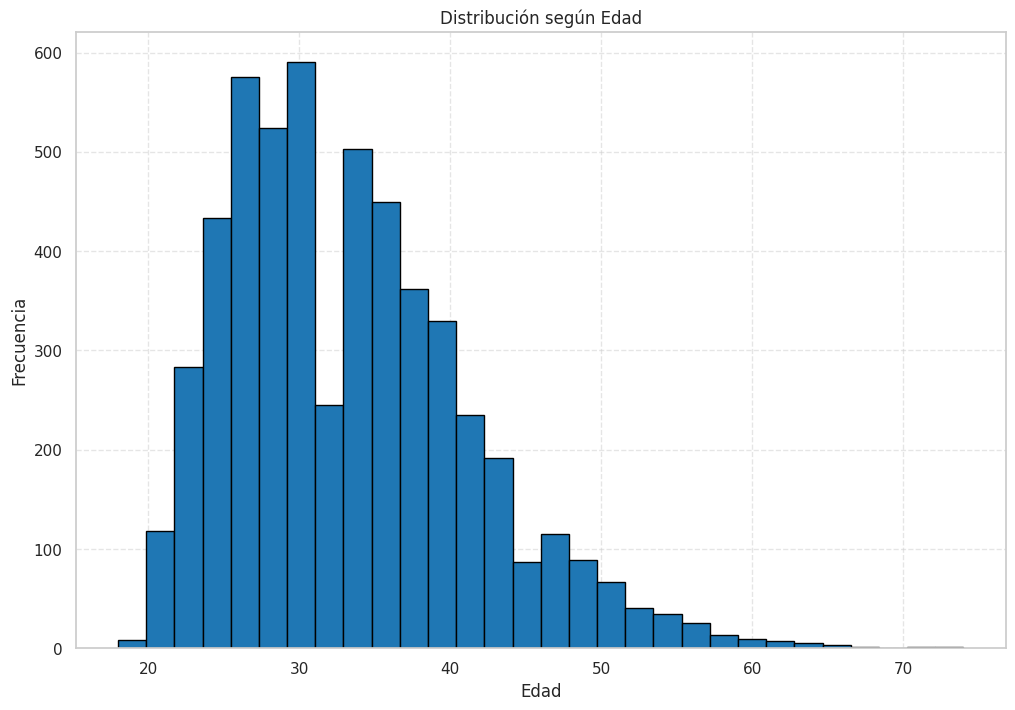

In [ ]:
# Histograma sobre Distribución de la Edad


plt.hist(df['profile_age'], bins=30, edgecolor='black')

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Distribución según Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

**Observación:**

En este histograma se puede observar que la tendencia de edad de los empleados se encuentra en el rango de 25años<X<30años

---

- Analizando la Experiencia Laboral en función del Sueldo Neto

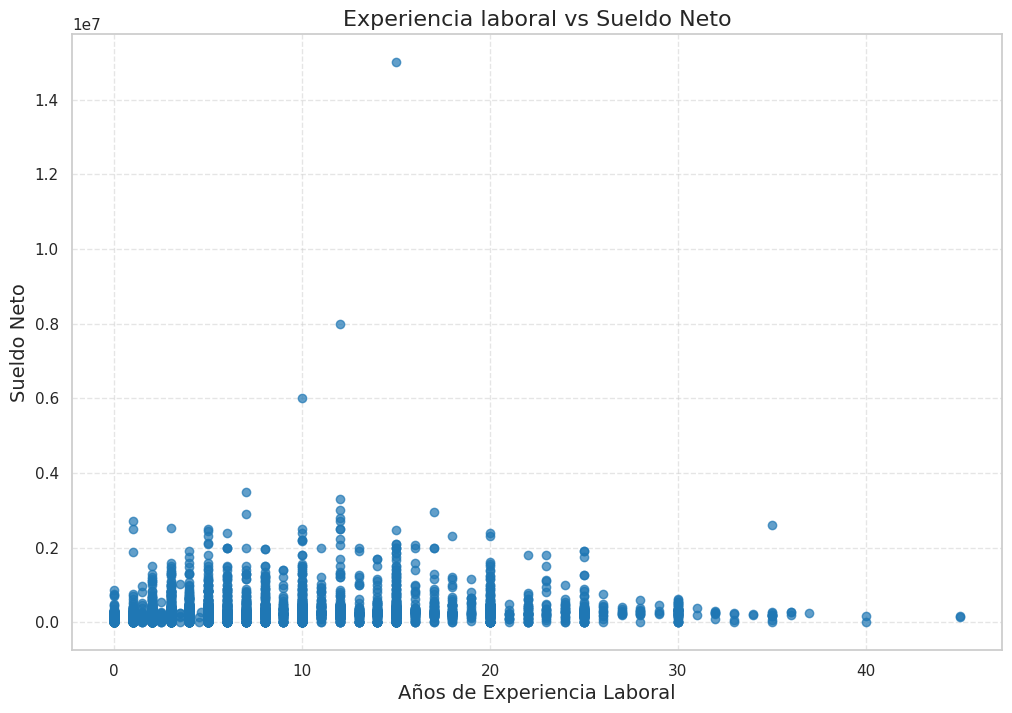

In [ ]:
# Gráfico de dispersión entre Experiencia Laboral y Sueldo Neto

plt.scatter(df['profile_years_experience'], df['salary_monthly_NETO'], alpha=0.7)

#Grilla
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

#Título y Ejes
plt.title('Experiencia laboral vs Sueldo Neto', size=16)
plt.xlabel('Años de Experiencia Laboral', size=14)
plt.ylabel('Sueldo Neto', size=14)

plt.show()

<font color='green'> Posible Mejora:

<font color='green'> Este gráfico, tal como está, nos da poca información, aunque se puede apreciar que el sueldo se incrementa al ir acumulando mayor experencia, al menos en los primeros 10-15 años, y luego parece comenzar a mermar.

<font color='green'> La idea, para dejar un gráfico más legible, es filtrar valores que parecen ser erróneos (outliers) y distorcionan el gráfico.

<font color='green'> A continuación, se intentará limpiar los datos fuera de rango para lograr darle una mejor interpretación al gráfico:

In [ ]:
# Busco valores máximos en salario neto y años de experiencia
columna_especifica_1 = 'salary_monthly_NETO'
columna_especifica_2 = 'profile_years_experience'
maximo_en_columna_1 = df[columna_especifica_1].max()
maximo_en_columna_2 = df[columna_especifica_2].max()

# Imprimo el resultado
print(f"Valor máximo en la columna 1 '{columna_especifica_1}': {maximo_en_columna_1}")
print(f"Valor máximo en la columna 2 '{columna_especifica_2}': {maximo_en_columna_2}")

# Busco el índice del máximo en la columna específica
indice_maximo_en_columna_1 = df[columna_especifica_1].idxmax()
indice_maximo_en_columna_2 = df[columna_especifica_2].idxmax()

# Imprimo el resultado
print(f"Índice del valor máximo en la columna 1'{columna_especifica_1}': {indice_maximo_en_columna_1}")
print(f"Índice del valor máximo en la columna 2'{columna_especifica_2}': {indice_maximo_en_columna_2}")

Valor máximo en la columna 1 'salary_monthly_NETO': 15000000.0
Valor máximo en la columna 2 'profile_years_experience': 45.0
Índice del valor máximo en la columna 1'salary_monthly_NETO': 3507
Índice del valor máximo en la columna 2'profile_years_experience': 502


In [ ]:
# Filtro los valores
df = df[(df['salary_monthly_NETO'] >= 0) & (df['salary_monthly_NETO'] <= 5000000)]
df.shape

(5345, 30)

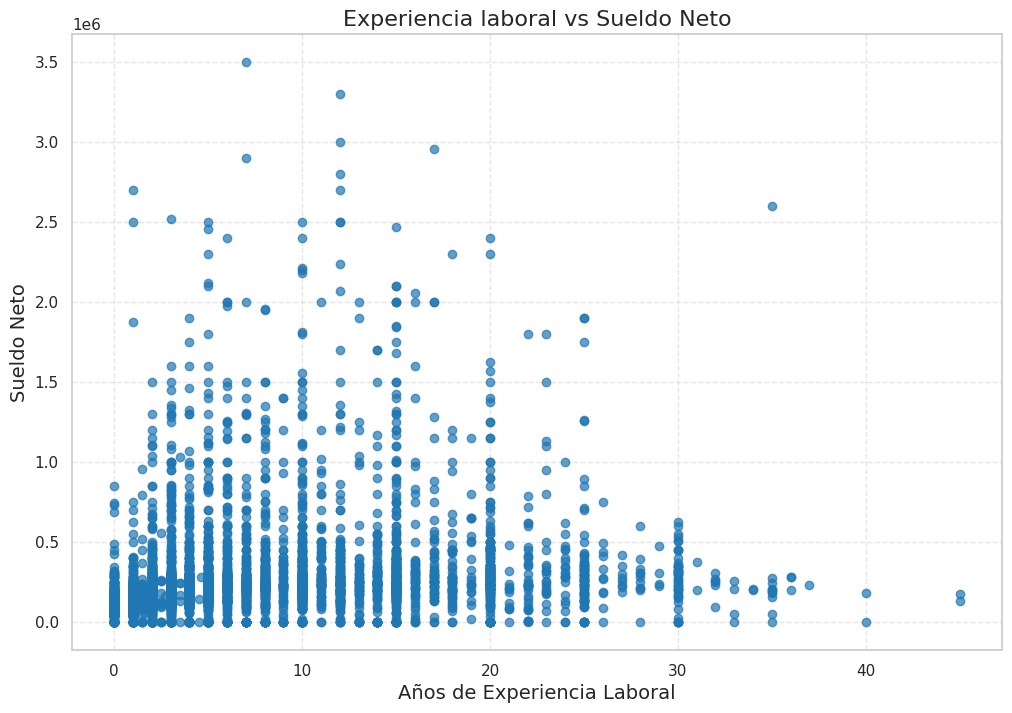

In [ ]:
# Gráfico de dispersión entre Experiencia Laboral y Sueldo Neto

#Paleta y Tamaño
plt.scatter(df['profile_years_experience'], df['salary_monthly_NETO'], alpha=0.7)

#Grilla
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

#Título y Ejes
plt.title('Experiencia laboral vs Sueldo Neto', size=16)
plt.xlabel('Años de Experiencia Laboral', size=14)
plt.ylabel('Sueldo Neto', size=14)

plt.show()

**Conclusión:**

El gráfico muestra como el salario va creciendo según los años de experiencia laboral, al menos en los 10-15 primeros años de experiencia. Por otro lado, se ve que los empleados con más de 15 años de experiencia suelen tener un sueldo base más alto.

---

- Analizando el Género que prevalece en el sector

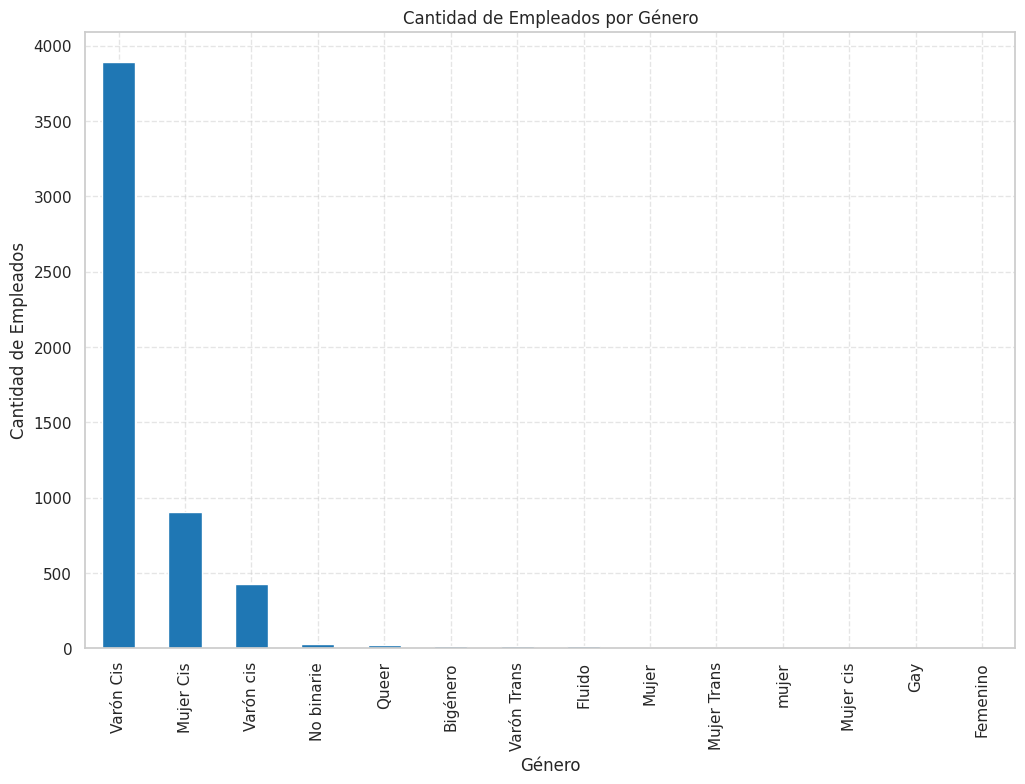

In [ ]:
# Gráfico de barras sobre la cantidad de empleados por género

df['profile_gender'].value_counts().plot(kind='bar')

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Cantidad de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.show()

<font color='green'> Posible Mejora: Se observa que hay categorías repetidas, por ej.: Varón Cis y Varón cis, que por distintos motivos (mayúsculas, tildes, otros) no se toman como lo mismo, y lo son. A continuación, se unificarán las categorías reemplazando los nombres:

In [ ]:
# Mostrar las categorías únicas antes de la unificación
print("Categorías únicas antes de la unificación:")
print(df['profile_gender'].unique())

Categorías únicas antes de la unificación:
['Varón Cis' 'Varón cis' 'Mujer Cis' 'Mujer' 'Varón Trans' 'Queer'
 'No binarie' 'Mujer cis' 'Mujer Trans' 'mujer' 'Gay' 'Fluido' 'Bigénero'
 'Femenino']


In [ ]:
# Defino un diccionario de mapeo para las correcciones
mapeo_categorias = {'Varón cis': 'Varón Cis', 'Mujer': 'Mujer Cis', 'Mujer cis': 'Mujer Cis',
                    'mujer': 'Mujer Cis', 'Femenino': 'Mujer Cis', 'Mujer': 'Mujer Cis'}

In [ ]:
# Aplico el mapeo para unificar las categorías
df['profile_gender'] = df['profile_gender'].replace(mapeo_categorias)

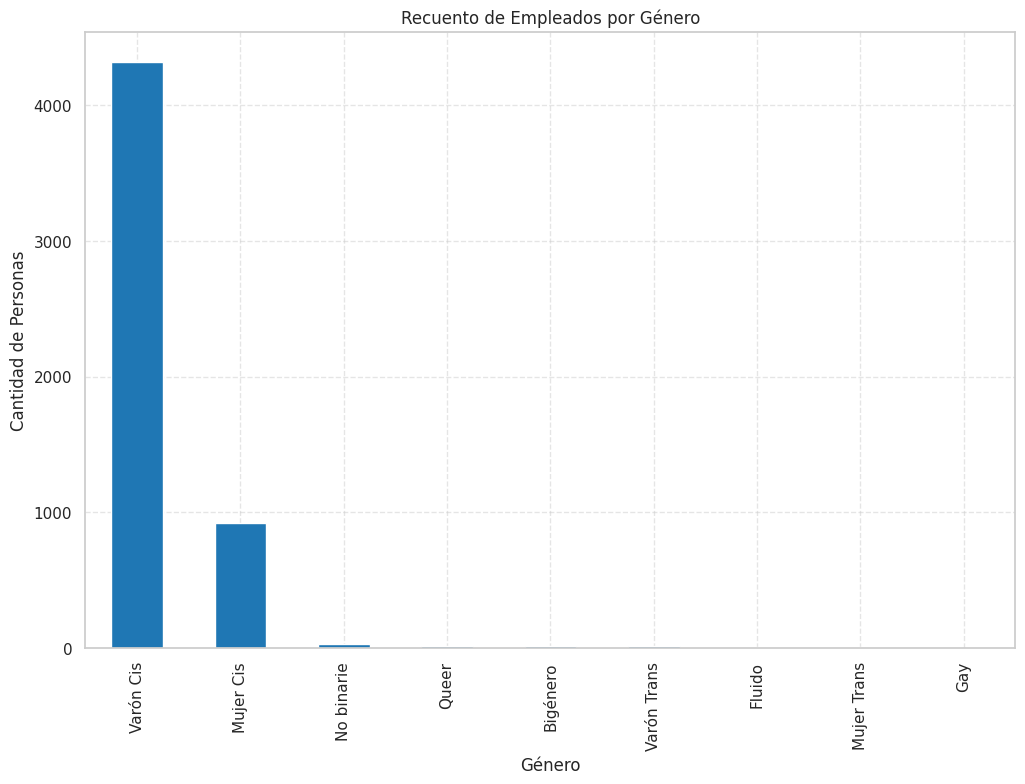

In [ ]:
# Gráfico de barras para mostrar el recuento de jugadores por equipo

df['profile_gender'].value_counts().plot(kind='bar')

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Recuento de Empleados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Personas')
plt.show()

**Conclusión:**

El género de Varón Cis es, por lejos, el que más representantes tiene entre los empleados en esta encuesta. Mientras que Mujer Cis lo sigue pero muy por debajo, casi 4 veces menos mujeres empleadas

---

**Gráficos en seaborn**

- Analizando bajo que tipo de contratación se encuentran los empleados del sector IT

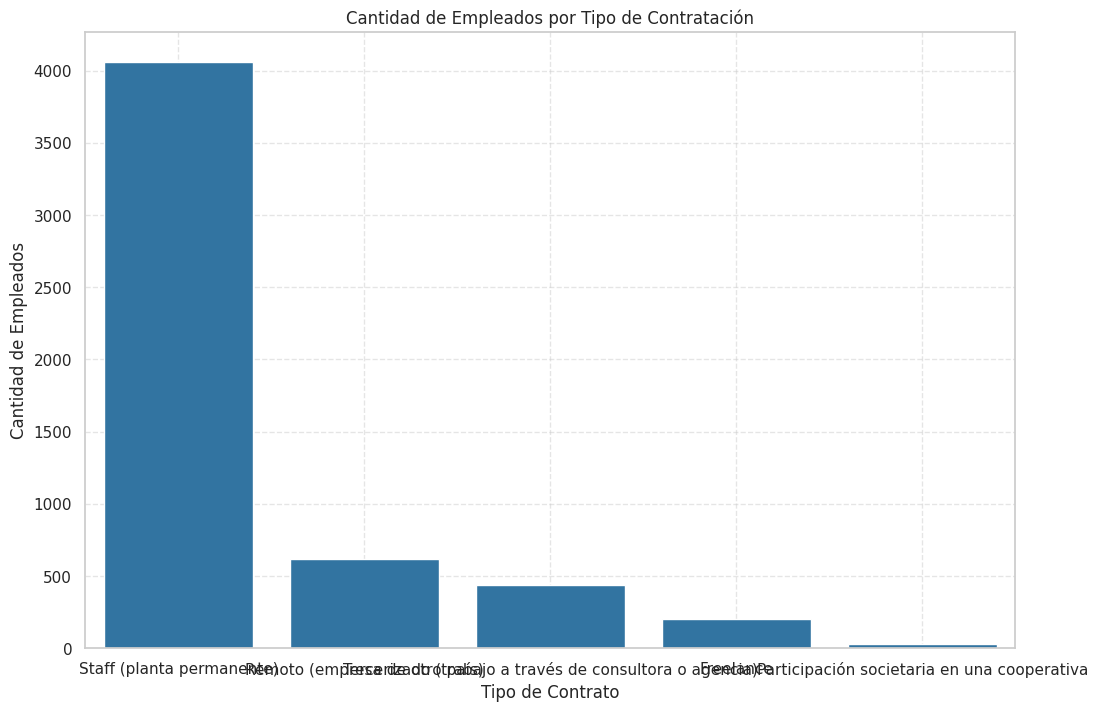

In [ ]:
# Gráfico de barras para mostrar el recuento de empleados por tipo de contratación

sns.countplot(x='work_contract_type', data=df)

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Cantidad de Empleados por Tipo de Contratación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Empleados')
plt.show()


<font color='green'> Posibles Mejoras: Las etiquetas del eje X son muy extensas. Modifico nombre para mejorar la legibilidad del gráfico.

In [ ]:
# Renombro valores en la columna 'work_contract_type'
df['work_contract_type'] = df['work_contract_type'].replace({'Staff (planta permanente)': 'Staff Fijo', 'Remoto (empresa de otro país)': 'Remoto (exterior)', 'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado', 'Participación societaria en una cooperativa': 'Socios en una Cooperativa'})

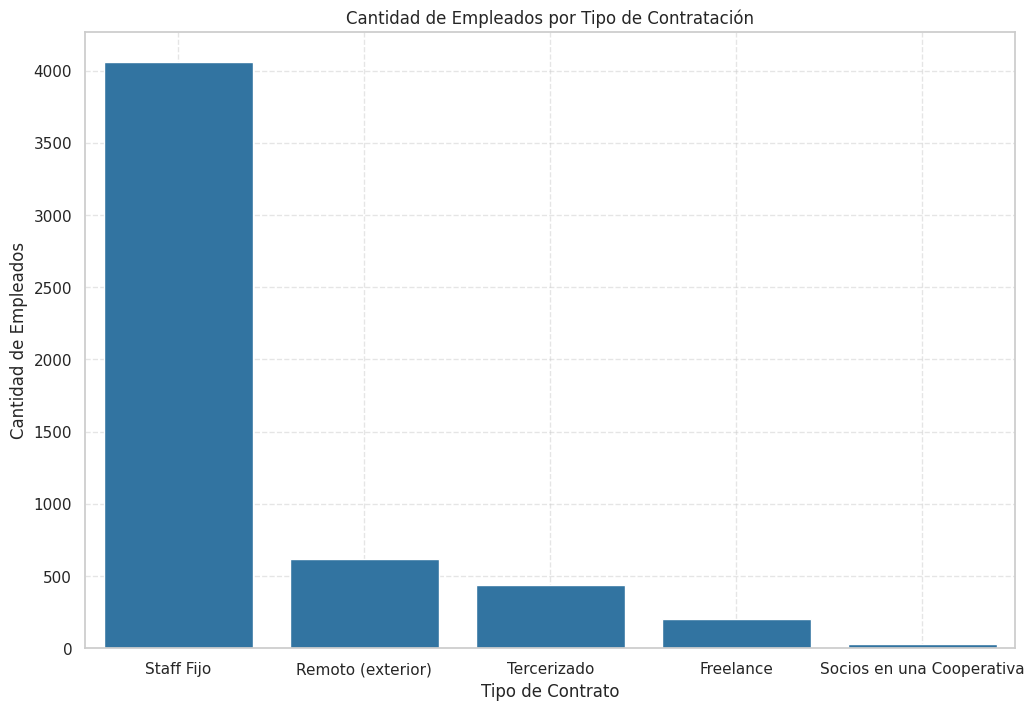

In [ ]:
# Gráfico de barras para mostrar el recuento de empleados por tipo de contratación

sns.countplot(x='work_contract_type', data=df)

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Cantidad de Empleados por Tipo de Contratación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Empleados')
plt.show()

**Conclusión:**

Se ve, claramente, que el tipo de contratación más habitual es el de Staff Fijo, mientras el resto de las opciones se encuentran 7 veces (o más) por debajo

---

- Analizando la presencia según lugar de origen del empleado

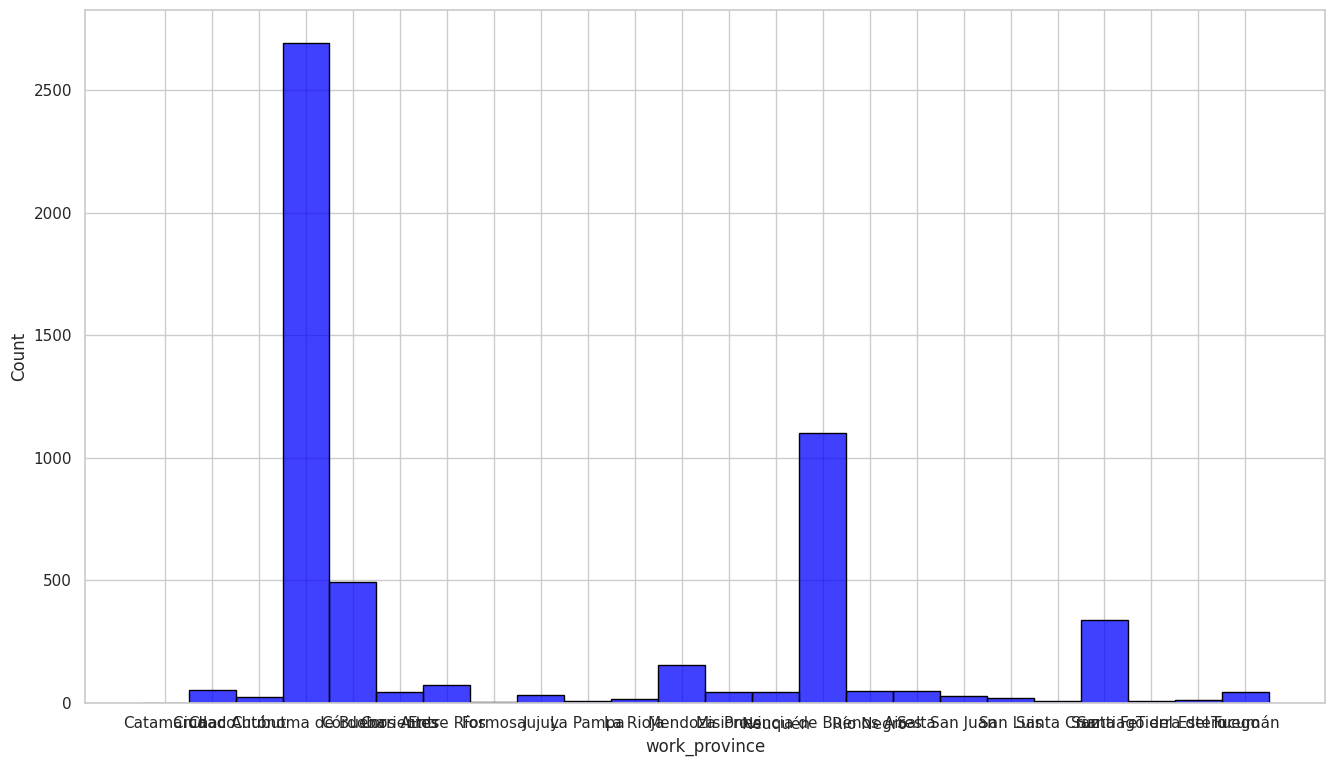

In [ ]:
# Frecuencia de empleados por provincia

sns.set(style='whitegrid')
plt.figure(figsize=(16, 9))
sns.histplot(df['work_province'], bins=20, kde=False, color='blue', edgecolor='black')
plt.show()

<font color='green'> Posible Mejora:

<font color='green'>Se observa que hay muchas provincias con pocos datos. En principio se intentará tomar el siguiente camino:
1. Poder ver las provincias involucradas y la cantidad de empleados de cada una
2. En base a eso, tomar una decisión sobre si es necesario filtrar algunos datos o no
3. Acomodar la etiqueta de cada provincia para mejorar legibilidad

In [ ]:
# Mostrar las categorías únicas antes de la unificación
print("Categorías únicas antes de la unificación:")
print(df['work_province'].unique())

Categorías únicas antes de la unificación:
['Catamarca' 'Chaco' 'Chubut' 'Ciudad Autónoma de Buenos Aires' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Provincia de Buenos Aires' 'Río Negro'
 'Salta' 'San Juan' 'San Luis' 'Santa Cruz' 'Santa Fe'
 'Santiago del Estero' 'Tierra del Fuego' 'Tucumán']


In [ ]:
# Renombro algunos valores en la columna 'work_contract_type'
df['work_province'] = df['work_province'].replace({'Ciudad Autónoma de Buenos Aires': 'CABA', 'Provincia de Buenos Aires': 'Bs As'})

In [ ]:
# identificar los valores únicos de una columna y contar la cantidad de cada uno de esos valores
conteo_provincias = df['work_province'].value_counts()
print('Cada provincia cuenta con esta cantidad de empleados: ', conteo_provincias)

Cada provincia cuenta con esta cantidad de empleados:  work_province
CABA                   2692
Bs As                  1100
Córdoba                 493
Santa Fe                340
Mendoza                 154
Entre Ríos               73
Chaco                    54
Salta                    50
Río Negro                47
Tucumán                  45
Neuquén                  45
Misiones                 44
Corrientes               44
Jujuy                    33
San Juan                 29
Chubut                   25
San Luis                 19
La Rioja                 16
Tierra del Fuego         14
Santiago del Estero       9
Santa Cruz                8
La Pampa                  7
Formosa                   3
Catamarca                 1
Name: count, dtype: int64


In [ ]:
# Filtrar las categorías que se repiten más de 35 veces
categorias_repetidas = conteo_provincias[conteo_provincias > 35].index.tolist()

# Filtrar el DataFrame original por las categorías repetidas
df_filtrado = df[df['work_province'].isin(categorias_repetidas)]

# Mostrar el resultado
print(df_filtrado)

     work_country work_province work_dedication work_contract_type  \
1       Argentina         Chaco       Full-Time  Remoto (exterior)   
2       Argentina         Chaco       Full-Time         Staff Fijo   
3       Argentina         Chaco       Full-Time  Remoto (exterior)   
4       Argentina         Chaco       Full-Time         Staff Fijo   
5       Argentina         Chaco       Full-Time         Staff Fijo   
...           ...           ...             ...                ...   
5353    Argentina       Tucumán       Full-Time         Staff Fijo   
5354    Argentina       Tucumán       Full-Time         Staff Fijo   
5355    Argentina       Tucumán       Full-Time  Remoto (exterior)   
5356    Argentina       Tucumán       Full-Time         Staff Fijo   
5357    Argentina       Tucumán       Part-Time          Freelance   

      salary_monthly_BRUTO  salary_monthly_NETO  numero  \
1                900000.00            850000.00    True   
2                120000.00            115

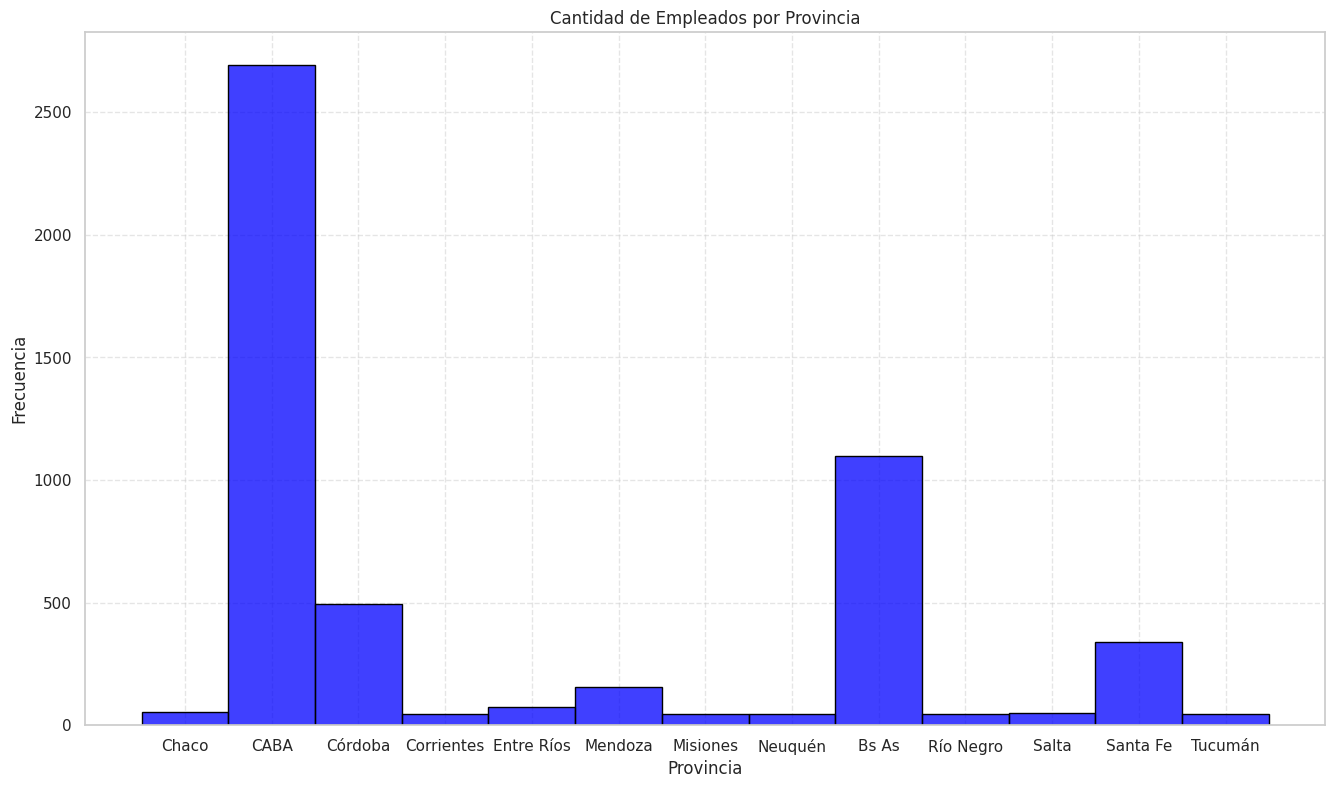

In [ ]:
# Crear gráfica de barras con seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(16, 9))

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

sns.histplot(df_filtrado['work_province'], bins=20, color='blue', edgecolor='black')


plt.title('Cantidad de Empleados por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')

plt.show()

**Conclusión:**

Las provincias con más empleo en el sector IT, según esta encuesta, son Buenos Aires, con CABA como principal contratador, seguidos por Córdoba y Santa Fe. Sería interesante correlacionar estas provincias con el sueldo que perciben. De esta manera, podremos tener una idea de la brecha salarial según el lugar geográfico dentro de la Argentina.

---

- Analizando la Distribución del Salarios Neto

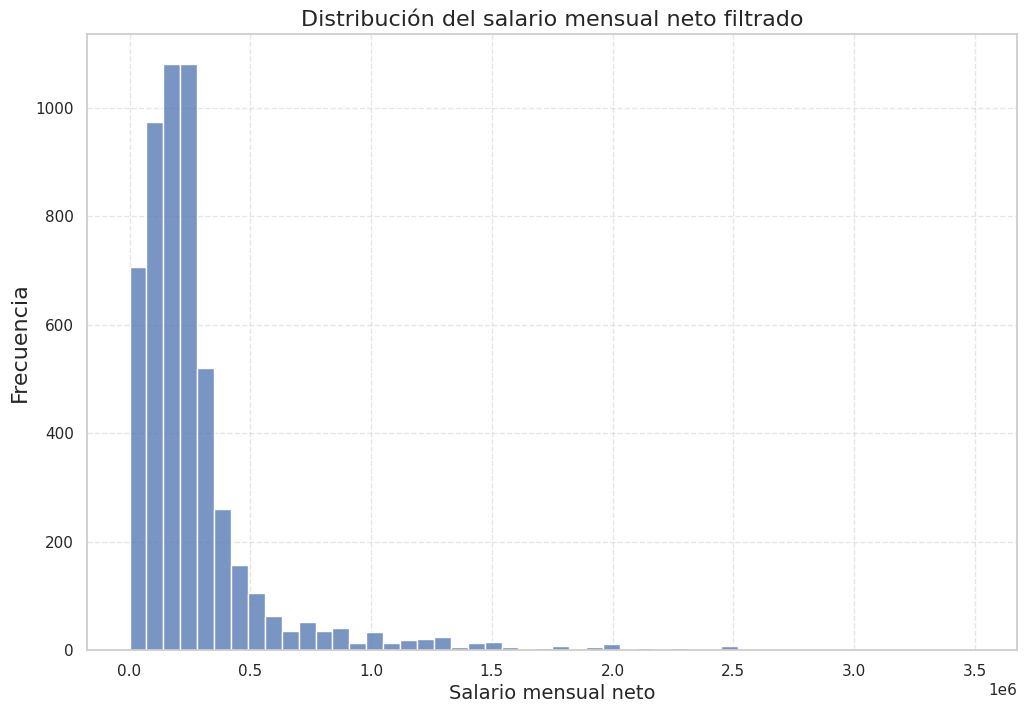

In [ ]:
# Crear el histograma con los datos
sns.histplot(data=df, x='salary_monthly_NETO', bins=50)

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.title('Distribución del salario mensual neto filtrado', size=16)
plt.xlabel('Salario mensual neto', size=14)
plt.ylabel('Frecuencia', size=16)
plt.show()

<font color='green'> Posible Mejora:

<font color='green'>El gráfico necesita un filtro en el eje x (salario mensual neto). Se presume que tiene un outlier y eso altera el gráfico de mala manera. A continuación, se trabajará con los percentiles 5 y 95 para ver si mejora la gráfica:

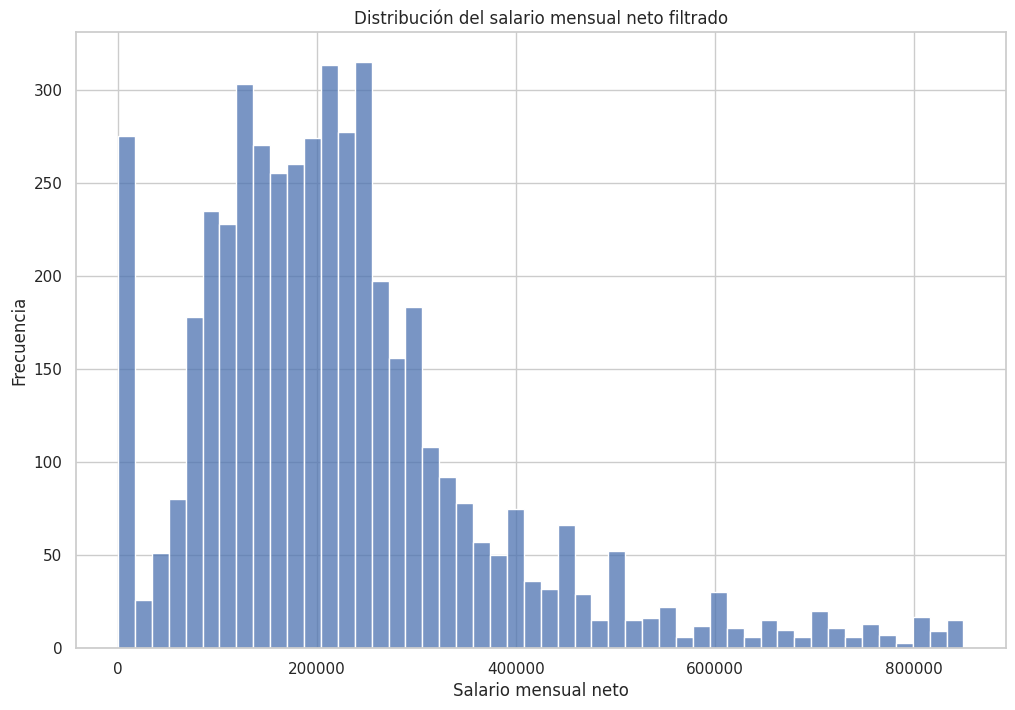

In [ ]:
#Limpieza de Datos

# Calculo los percentiles 5 y 95 de la columna salary_monthly_NETO
q5 = df['salary_monthly_NETO'].quantile(0.05)
q95 = df['salary_monthly_NETO'].quantile(0.95)

# Filtro los valores que están dentro del rango intercuartílico
df_filtered = df[(df['salary_monthly_NETO'] >= q5) & (df['salary_monthly_NETO'] <= q95)]

# Creo el histograma con los datos filtrados

sns.histplot(data=df_filtered, x='salary_monthly_NETO', bins=50)

plt.title('Distribución del salario mensual neto filtrado')
plt.xlabel('Salario mensual neto')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4816 entries, 0 to 5357
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   work_country                            4816 non-null   object 
 1   work_province                           4816 non-null   object 
 2   work_dedication                         4816 non-null   object 
 3   work_contract_type                      4816 non-null   object 
 4   salary_monthly_BRUTO                    4816 non-null   float64
 5   salary_monthly_NETO                     4816 non-null   float64
 6   numero                                  4816 non-null   bool   
 7   salary_has_bonus                        4816 non-null   object 
 8   salary_bonus_tied_to                    4816 non-null   object 
 9   salary_inflation_adjustment             4816 non-null   object 
 10  salary_percentage_inflation_adjustment  4816 non-null   object 
 

In [ ]:
df.shape

(5345, 30)

In [ ]:
# Contar la frecuencia de cada valor único
salary_freq = df['salary_monthly_NETO'].value_counts()
print(salary_freq)


salary_monthly_NETO
0.00         254
250000.00     95
200000.00     90
300000.00     87
230000.00     85
            ... 
249724.00      1
765948.00      1
126148.00      1
155625.00      1
297750.00      1
Name: count, Length: 1638, dtype: int64


In [ ]:
# Filtrar el DataFrame para incluir solo los salarios iguales a 0
salarios_0 = df[df['salary_monthly_NETO'] == 0]

# Contar la frecuencia de cada valor único
frecuencia_salarios_0 = salarios_0['salary_monthly_NETO'].value_counts()

# Imprimir la frecuencia de los salarios iguales a 0
print(frecuencia_salarios_0)


salary_monthly_NETO
0.00    254
Name: count, dtype: int64


In [ ]:
# Filtrar el DataFrame para incluir solo los salarios mayores a 1500000
salarios_mayores_1500000 = df[df['salary_monthly_NETO'] > 2000000]

# Contar la frecuencia de cada valor único
frecuencia_salarios_mayores_1500000 = salarios_mayores_1500000['salary_monthly_NETO'].value_counts()

# Imprimir la frecuencia de los salarios mayores a 1500000
print(frecuencia_salarios_mayores_1500000)


salary_monthly_NETO
2500000.00    5
2100000.00    3
2400000.00    3
2700000.00    2
2300000.00    2
2470000.00    1
2240000.00    1
2456500.00    1
2957500.00    1
3300000.00    1
2058420.00    1
2070000.00    1
2185000.00    1
2900000.00    1
2800000.00    1
2120000.00    1
2304000.00    1
2600000.00    1
2215000.00    1
2200000.00    1
3500000.00    1
3000000.00    1
2520000.00    1
Name: count, dtype: int64


In [ ]:
# Filtro los valores (saco los 0(ceros) y los menos a 1.500.000)
df = df[(df['salary_monthly_NETO'] > 0) & (df['salary_monthly_NETO'] <= 1500000)]
df.shape

(5017, 30)

**Conclusión:**

Se puede observar que el salario más usual ronda los 200.000ARS, mientras que tenemos una frecuencia grande en el 0, esto debe darse por gente que no completó la celda y se interpretó como cero la misma.

---
<font color='red'>**Aclaración**: Mientras se realizaban los gráficos, quedaron en evidencia distintos problemas (outliers, datos mal ingresados, problemas con las etiquetas, unificación de variables, etc.). Si bien las distintas dificultades fueron sorteadas satisfactoriamente se deja, como trabajo futuro, realizar estas modificaciones sobre el DF en sí (un nuevo data wrangling o, mejor dicho, una mejora del Data Wrangling aplicado en la sección 5) para así no acarrear ese problema a futuro y tener el DF bien definido.</font>


<font color='red'>**Aclaración**: Las modificaciones fueron realizadas, pero se seguirá trabajando en el mismo

---

In [ ]:
# Reviso el DF para visualizar modelo definitivo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5017 entries, 0 to 5357
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   work_country                            5017 non-null   object 
 1   work_province                           5017 non-null   object 
 2   work_dedication                         5017 non-null   object 
 3   work_contract_type                      5017 non-null   object 
 4   salary_monthly_BRUTO                    5017 non-null   float64
 5   salary_monthly_NETO                     5017 non-null   float64
 6   numero                                  5017 non-null   bool   
 7   salary_has_bonus                        5017 non-null   object 
 8   salary_bonus_tied_to                    5017 non-null   object 
 9   salary_inflation_adjustment             5017 non-null   object 
 10  salary_percentage_inflation_adjustment  5017 non-null   object 
 

---
## **7.1 Análisis de la variable "lenguajes de programación"**

<font color='red'> **Aclaración:** Se realiza un estudio separado de la variable "Herramientas de Lenguajes de Programación" porque resultó ser de difícil análisis y, a medida que se desarrollaba el estudio de la misma, se fue complejizando su estudio.

Se dividirá el estudio en los siguientes tópicos:
- Estudio de Lenguajes de programación más populares, en subpoblaciones con  "mejores" y "peores" salarios.
- Estudio de los lenguajes con mejores salarios.

En principio, se trabajará con los datos que contiene la variable para lograr analizarlos, procesarlos y de esta manera dejarlos útiles.

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [ ]:
# Valores de lenguajes de programación ingresados por los encuestados
df.tools_programming_languages.value_counts()

tools_programming_languages
Ninguno de los anteriores                           831
SQL                                                 212
Python                                              158
Python, SQL                                         138
CSS, HTML, Javascript, TypeScript                   107
                                                   ... 
Bash/Shell, C++, COBOL, HTML, Java, SQL               1
Arduino, Assembler, C, C++, Java, Matlab, Python      1
.NET, C#, HTML, PHP, VBA                              1
Gestiono usando mails y Teams                         1
.NET, C#, Java, Javascript                            1
Name: count, Length: 1249, dtype: int64

**Observaciones:**

- Como se vio en la exploración inicial (sección 0 y 6), hay más de mil valores diferentes ingresados en el campo `tools_programming_languages`, donde la moda era "Ninguno de los Anteriores".

- Debido a que los usuarios ingresaron como lenguaje uno o más valores, separados por coma y de texto libre, debemos buscar la manera de normalizarlos, para quedarnos con una lista de aquellos identificados como válidos, para luego poder procesar y analizar.

<font color='green'> **Mejora:** Conversión de cada lenguaje a variables categóricas (One hot encoding)

Con ésta técnica se tendrá el mismo dataframe con nuevas columnas (una por cada lenguaje identificado, o los N más frecuentes) donde asignaremos valores binarios (0 y 1).
Entonces, por ej., alguien que utiliza sólo Python va a tener un verdadero (equivalente a un 1) en esa columna y un falso en Java (0), SQL (0), etc. De esta manera iremos construyendo una matriz.

In [ ]:
#Función Auxiliar

FREQ = 10

def one_hot_encoding(df, column, separator=',', freq=FREQ):
    """
    Retorna un nuevo df con una columna por cada valor posible en 'column',
    de acuerdo al separador. Y se queda con las columnas cuya frecuencia sea
    mayor a 'freq'
    """
    df_one_hot = df[column]\
        .str.replace(' ', '')\
        .str.lower()\
        .str.get_dummies(sep=separator)
    for column in df_one_hot.columns:
        if (df_one_hot[column].sum() < freq):
            df_one_hot.drop(column, inplace=True, axis=1)
            df_one_hot.reset_index(drop=True, inplace=True)
    return df_one_hot

In [ ]:
# Se convierte cada lenguaje en una columna con 0 o 1
# Quedan solo las columnas cuya frecuencia sea mayor a 10
print("Tamaño del dataset: %i \n" % len(df))
df_one_hot = one_hot_encoding(
    df,
    'tools_programming_languages',
    separator=',',
    freq= 10
)


Tamaño del dataset: 5017 



In [ ]:
# Se eliminan las columnas 'ningunodelosanteriores' ya que no aportan
# al análisis de lenguajes
df_one_hot.drop(columns=['ningunodelosanteriores'], axis=1, inplace=True)
df_one_hot.reset_index(drop=True, inplace=True)
print("Tamaño del nuevo dataframe df_one_hot: ", df_one_hot.shape, "\n")

Tamaño del nuevo dataframe df_one_hot:  (5017, 37) 



In [ ]:
# Concatenación de ambos dataframes (el df y el df_one_encoding) para agregar las columnas de cada lenguaje
df.reset_index(drop=True, inplace=True)
df_nuevo = pd.concat([df, df_one_hot], axis=1)
df.reset_index(drop=True, inplace=True)
print("Tamaño del dataframe agregando una columna por cada lenguaje: ", df.shape, "\n")
df_nuevo.head(5)

Tamaño del dataframe agregando una columna por cada lenguaje:  (5017, 30) 



,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,...,r,ruby,rust,scala,smalltalk,solidity,sql,swift,typescript,vba
0,Argentina,Catamarca,Full-Time,Staff Fijo,300000.00,245000.00,True,No,No recibo bono,No,...,0,0,0,0,0,0,0,0,0,0
1,Argentina,Chaco,Full-Time,Remoto (exterior),900000.00,850000.00,True,No,No recibo bono,No,...,0,0,0,0,0,0,1,0,1,0
2,Argentina,Chaco,Full-Time,Staff Fijo,120000.00,115000.00,True,Un sueldo,Performance de la compañía,Dos,...,0,0,0,0,0,0,0,0,0,0
3,Argentina,Chaco,Full-Time,Staff Fijo,140000.00,125000.00,True,No,No recibo bono,Uno,...,0,0,0,0,0,0,0,0,0,0
4,Argentina,Chaco,Full-Time,Staff Fijo,633000.00,395000.00,True,De uno a tres sueldos,Performance individual,Uno,...,0,0,0,0,0,0,0,0,0,0


**Observaciones:**

- Tenemos ahora 37 valores de "lenguajes de programación", los que tienen frecuencia mayor a 10 (i.e. 37 columnas con 0 y 1, se conserva una fila por encuestado).

In [ ]:
# Tabla de frecuencias de lenguajes (los 10 más populares)
lang_columns = df_one_hot.columns
lang_freq = df_nuevo[lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq = lang_freq.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq[:10]

,Language,Freq
0,javascript,1989
1,sql,1974
2,html,1460
3,python,1315
4,css,988
5,java,915
6,typescript,866
7,bash/shell,800
8,.net,593
9,php,566


In [ ]:
# Total de ocurrencias de lenguajes
len_freq = lang_freq['Freq'].sum()
print("Total de ocurrencias de lenguajes:", len_freq, "\n")
# Cantidad de ocurrencias de los primeros 10 lenguajes más frecuentes
print("Porcentaje de ocurrencias de los primeros 10 lenguajes más frecuentes: {:.2f}%".format(lang_freq['Freq'][:10].sum()/len_freq*100))

Total de ocurrencias de lenguajes: 13472 

Porcentaje de ocurrencias de los primeros 10 lenguajes más frecuentes: 85.11%


**Conclusión Inicial:**

* Se puede visualizar en la tabla de frecuencias que "Javascript" es el lenguaje más popular (2139 personas lo nombraron/utilizan) del total de 5348 encuestados/as en el sector TI de Argentina.

* Luego le siguen en nivel de popularidad "SQL", "HTML" y "Java".

* "Python" ocupa el cuarto lugar del ranking de ocurrencias, siendo nombrado por  1408 personas de las 5348 personas que constituyen la muestra total.

* Si se suman todas las respuestas de lenguajes utilizados (con frecuencia mayor a 10), brindadas por las 5348 personas en estudio, se obtiene un total de 14349 ocurrencias de lenguajes.

* Los 10 primeros lenguajes según su ranking de popularidad, concentran el 85% (84,96%) de las 14349 respuestas totales brindadas por lo trabajadores TI de Argentina.

* En el gráfico de barras de abajo se representa el ranking de lenguajes según su popularidad, medida ésta por la cantidad de respuestas acumuladas por cada uno de ellos.



<ipython-input-169-ecd0cecd3e45>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x) for x in vals])


[Text(0.0, 0, '0'),
 Text(250.0, 0, '250'),
 Text(500.0, 0, '500'),
 Text(750.0, 0, '750'),
 Text(1000.0, 0, '1000'),
 Text(1250.0, 0, '1250'),
 Text(1500.0, 0, '1500'),
 Text(1750.0, 0, '1750'),
 Text(2000.0, 0, '2000'),
 Text(2250.0, 0, '2250')]

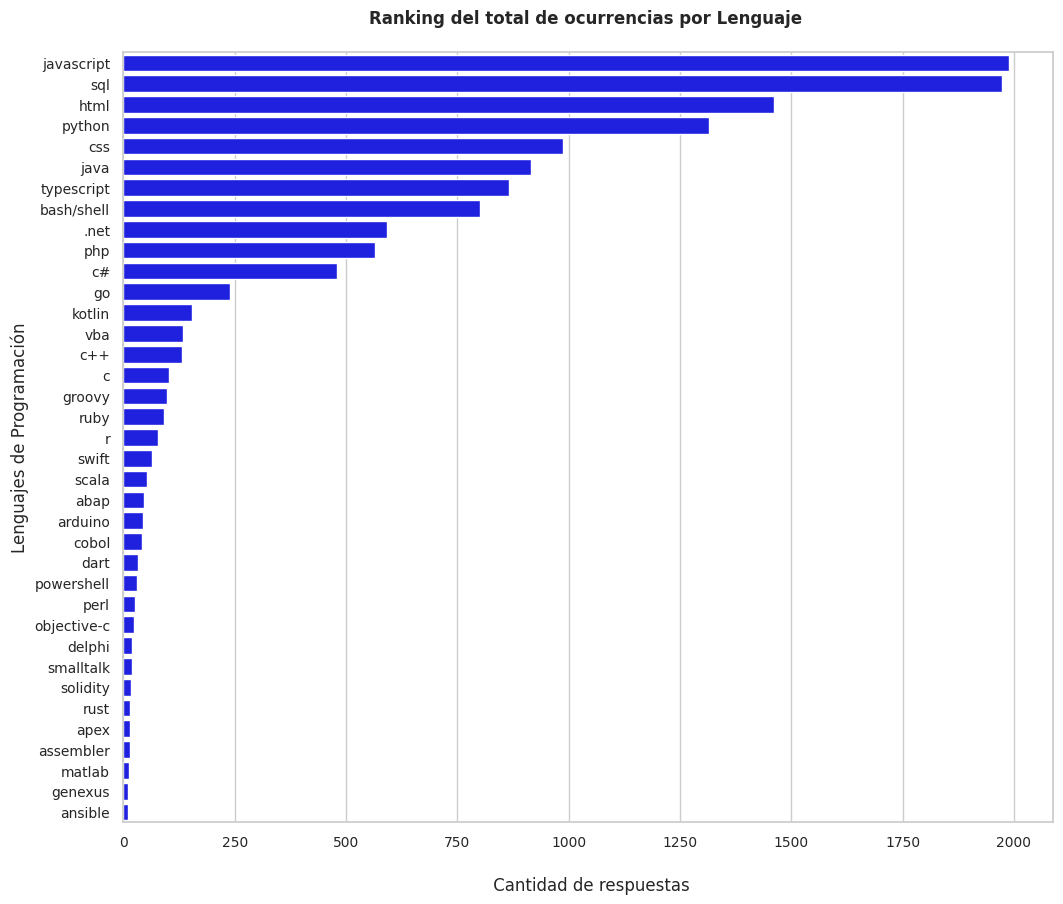

In [ ]:
# Gráfico de distribución de ocurrencias de lenguajes
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Freq', y='Language', data=lang_freq, color="blue")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Ranking del total de ocurrencias por Lenguaje \n", fontsize=12, weight='bold')
plt.xlabel("\n Cantidad de respuestas", fontsize=12)
plt.ylabel("Lenguajes de Programación", fontsize=12)
#plt.annotate('Gráfico XXX', xy = (0.5, -0.15), xycoords='axes fraction', ha='right', va='center', fontsize=12) #Esto es para el pie de gráfico
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0f}'.format(x) for x in vals])

---
>**Estudio de Lenguajes de programación más populares, en subpoblaciones con  "mejores" y "peores" salarios**

* En la siguiente tabla, se muestra un ranking de los lenguajes según su popularidad (sumatoria de respuestas de cada uno), pero sólo para la subpoblación de trabajadores que tienen un "salario neto igual o superior a su mediana en toda la distribución".

* En la tabla subsiguiente se hace el procedimiento análogo, pero para la subpoblación de trabajadores con "salario neto inferior a la mediana general".

In [ ]:
# Lenguajes más populares entre trabajadores/as que ganan más o igual que la mediana del salario neto.
avg_salary = df_nuevo['salary_monthly_NETO'].median()
print("Mediana general del salario neto: %i \n" % avg_salary)
print("Ranking de lenguajes según popularidad, para la 'SUBPOBLACIÓN CON MEJORES SALARIOS (>= Mediana)': \n ")
is_above_avg = df['salary_monthly_NETO'] >= avg_salary
lang_freq2= df_nuevo[is_above_avg][lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq2 = lang_freq2.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq2[:10]

Mediana general del salario neto: 210000 

Ranking de lenguajes según popularidad, para la 'SUBPOBLACIÓN CON MEJORES SALARIOS (>= Mediana)': 
 


,Language,Freq
0,javascript,1006
1,sql,1001
2,python,797
3,html,674
4,java,539
5,bash/shell,474
6,typescript,453
7,css,428
8,.net,319
9,php,277


In [ ]:
# Lenguajes más populares entre trabajadores/as que ganan menos que la mediana del salario neto.
is_above_avg2 = df_nuevo['salary_monthly_NETO'] < avg_salary
print("Mediana general del salario neto: %i \n" % avg_salary)
print("Ranking de lenguajes según popularidad, para la 'SUBPOBLACIÓN CON PEORES SALARIOS (< Mediana)': \n ")
lang_freq3= df_nuevo[is_above_avg2][lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq3 = lang_freq3.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq3[:10]

Mediana general del salario neto: 210000 

Ranking de lenguajes según popularidad, para la 'SUBPOBLACIÓN CON PEORES SALARIOS (< Mediana)': 
 


,Language,Freq
0,javascript,983
1,sql,973
2,html,786
3,css,560
4,python,518
5,typescript,413
6,java,376
7,bash/shell,326
8,php,289
9,.net,274


**Conclusión:**

- Al comparar las tablas, se puede ver que los lenguajes "Javascript" y "SQL" se mantienen en el primer y segundo puesto a pesar de variar las subpoblaciones en función de su nivel de salario neto.

- La diferencia aparece en el tercer lugar: "Python" ocupa este puesto entre los trabajadores de "mejores salarios" y "HTML" ocupa este lugar entre los trabajadores de "peores salarios".

- Sin embargo, a pesar de las variaciones en las posiciones, prácticamente todos los lenguajes que están entre los 10 más populares de la población mejor paga, están también entre los 10 más populares de la población peor paga.

- **Observando los datos presentados, pareciera ser difícil hablar de una asociación entre la popularides de los lenguajes de programación y salarios mejores pagos. Entre las dificultades que se encuentran para establecer esta relación se destaca que:**

    - **Los lenguajes más usados se repiten en ambas subpoblaciones (diferenciadas por nivel de salario), sin mostrar un patrón característico o asociación de lenguajes exclusivos para cada grupo.**
    
    - **las personas que responden haber utilizado un lenguaje, pueden utilizar uno o varios otros lenguajes diferentes más. Al trabajar con las ocurrencias agrupadas por lenguajes (y por lo tanto existir la posibilidad de repetición de personas en los listados de lenguajes) no se puede establecer una relación biunívoca entre salario y lenguajes.**

---
>**Estudio de Lenguajes "mejores pagos"**

- Intentando buscar respuesta a la asociación entre lenguajes de programación y salarios mejores pagos, se analizará el ranking de los lenguajes en función de la mediana de la distribución de salarios netos de quienes los nombraron.

- En otras palabras, se ordenaran los lenguajes, de mayor a menor mediana de salarios de quienes los usan

,Language,Median_Salary,Freq
0,solidity,329000.00,18
1,objective-c,305000.00,24
2,ansible,304850.00,10
3,scala,304000.00,54
4,ruby,299990.00,91
5,go,295000.00,239
6,kotlin,260000.00,155
7,perl,250000.00,27
8,abap,250000.00,47
9,rust,250000.00,15


Text(0, 0.5, 'Lenguajes de Programación \n')

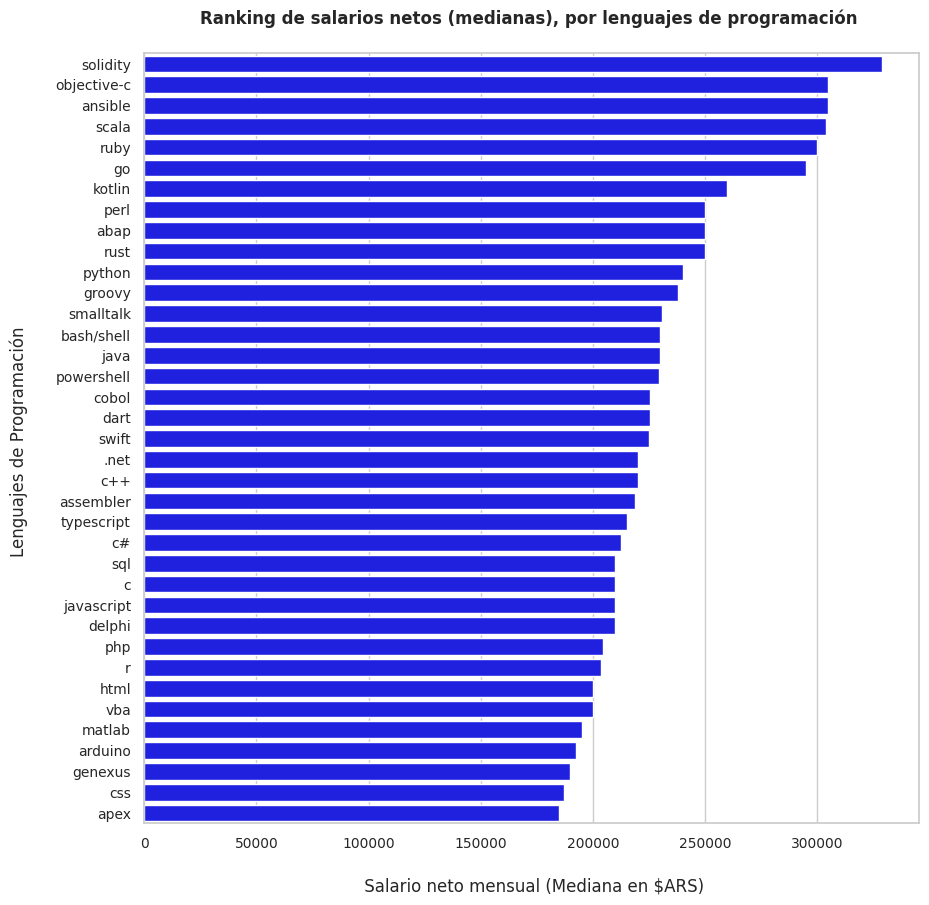

In [ ]:
#Tabla de frecuencias
salary_median_by_lang = {}
for lang in lang_columns:
  median_salary = df_nuevo[df_nuevo[lang]==1]['salary_monthly_NETO'].median()
  freq = len(df_nuevo[df_nuevo[lang]==1])
  salary_median_by_lang.update({lang: [median_salary, freq]})
df2 = pd.DataFrame(list(salary_median_by_lang.items()), columns=['Language','Median_Salary_and_Freq'])
df2[['Median_Salary','Freq']] = pd.DataFrame(df2.Median_Salary_and_Freq.tolist(), index= df2.index)
df2.drop('Median_Salary_and_Freq', axis=1, inplace=True)
df2 = df2.sort_values(by=['Median_Salary'], ascending=False, ignore_index=True)
display(df2[:10])

# Plot de salarios neto (mediana) por lenguaje de programación
plt.figure(figsize=(10, 10))
sns.barplot(x="Median_Salary", y="Language", data=df2, color="blue" )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Ranking de salarios netos (medianas), por lenguajes de programación \n', fontsize=12, weight='bold')
plt.xlabel("\n Salario neto mensual (Mediana en $ARS)", fontsize=12)
plt.ylabel("Lenguajes de Programación \n", fontsize=12)
#plt.annotate('Gráfico XXX', xy = (0.5, -0.15), xycoords='axes fraction', ha='right', va='center', fontsize=12)

**Conclusión:**

- Según este nuevo ordenamiento, los primeros cinco lenguajes "asociados" o usados por personas con los salarios medianos más altos, son:
  1. Solidity
  2. Rust
  3. Scala
  4. Objective-C
  5. Ansible (es una plataforma)

- Lo que hay que notar es que tal como se observa en la tabla, "Solidity" tiene muy pocas observaciones, tal como ocurre con "Objective-C", "Rust" y "Ansible"; dificultando la posibilidad de considerar como representativo este resultado.

- También es necesario aclarar la posibilidad de que una persona esté representada en distintas barras por haber respondido más de un lenguaje.

- Por último, se visualiza en el gráfico que el rango de la mediana de salarios que va desde \$180.000 (aprox) a \$400.000.

## **7.2 Análisis de dos variables numéricas (Salario bruto y neto, ambos en la misma moneda, en pesos)**
`salary_monthly_NETO` vs. `salary_monthly_BRUTO`

¿Por qué la estudio?

Quiero decidir si sacar o no la columna de salario bruto, por lo que busco si existe algún tipo de asociación (o no) entre ellas. Para hacer la encuesta más simple. ¿Existe una correlación entre el salario bruto y el neto? ¿Qué abordaje y medidas usaría?
¿Cómo lo haré?

Visualizaré primero la distribución conjunta de ellas a través de un scatterplot.

Utilizo los datos de salario ya "curados".

In [ ]:
## Función auxiliar "remove_outlier"

def remove_outlier(df_in, col_name, iqr_factor = 1.5):
    """
    IQR outliers removal
    (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
    accept a dataframe, remove outliers, return cleaned data in a new dataframe
    see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
    """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 # interquartile range
    fence_low  = q1 - iqr_factor*iqr
    fence_high = q3 + iqr_factor*iqr
    df_inliers = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_inliers, df_outliers

In [ ]:
# Salario Mínimo en Argentina de Octubre 2021 a Octubre del 2022 (la encuesta es de Julio/Agosto 2022).
MIN_WAGE = float(30000)

# Frecuencia default para visualizaciones
FREQ = 10

<ipython-input-175-149a063afe50>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, s=30, cmap="summer", edgecolor='black', linewidth=1, alpha=0.75)


Text(0.5, -0.25, 'XXXXX')

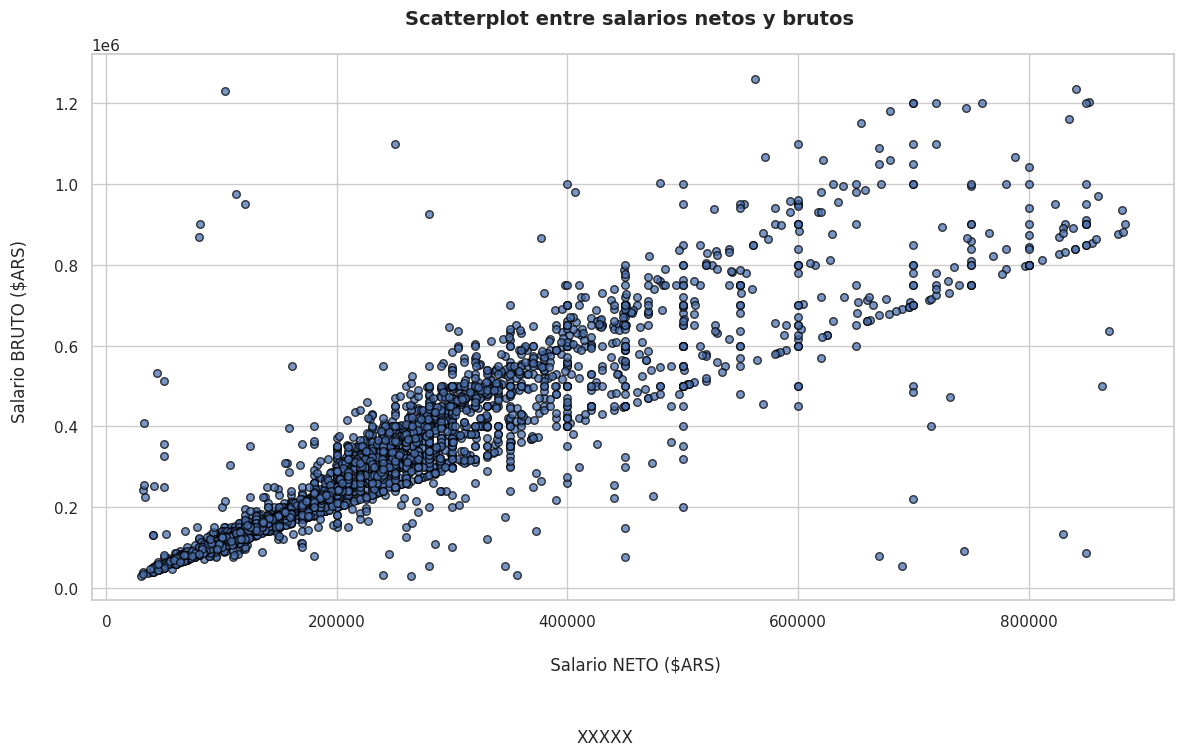

In [ ]:
df_in_bruto, df_out_bruto = remove_outlier(df, 'salary_monthly_BRUTO', 3.5)
df_in_neto, df_out_neto = remove_outlier(df, 'salary_monthly_NETO', 3.5)

df_in_neto = df_in_neto.query('salary_monthly_NETO >= @MIN_WAGE')
df_in_bruto = df_in_bruto.query('salary_monthly_BRUTO >= @MIN_WAGE')

df['cured_salary_neto'] = df_in_neto['salary_monthly_NETO']
df['cured_salary_bruto'] = df_in_bruto['salary_monthly_BRUTO']

x = df["cured_salary_neto"]
y = df["cured_salary_bruto"]

fig = plt.figure(figsize=(12, 7))
plt.scatter(x,y, s=30, cmap="summer", edgecolor='black', linewidth=1, alpha=0.75)
plt.title("Scatterplot entre salarios netos y brutos \n", fontsize=14, weight='bold')
plt.xlabel("\n Salario NETO ($ARS)")
plt.ylabel("Salario BRUTO ($ARS) \n")
plt.tight_layout()
plt.annotate(
    'XXXXX',
    xy=(0.5, -0.25),
    xycoords='axes fraction',
    ha='right',
    va='center',
    fontsize=12
)

**Observaciones:**

Si bien algunos outliers persisten a la curación, con la limpieza de outliers se quitaron muchos datos que podrían ser cargados por error o que denotaban situaciones poco reales.

El gráfico de dispersión entre el Salario Bruto y Neto que se muestra arriba (Gráfico XXXXXX - Scatterplot) nos da la pauta de que existe una relación lineal positiva entre las variables, y que por lo tanto no son independientes.

In [ ]:
# Correlación
corr_df = df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].corr(method="spearman")
corr = corr_df['salary_monthly_NETO']['salary_monthly_BRUTO']
print("La correlación entre ambas variables es:", corr)

La correlación entre ambas variables es: 0.9233668994028285


In [ ]:
# Coeficiente de variación
X_coef_var = df['salary_monthly_NETO'].std() / df['salary_monthly_NETO'].mean()
Y_coef_var = df['salary_monthly_BRUTO'].std() / df['salary_monthly_BRUTO'].mean()
print("coef. de var. de Salario Neto:", X_coef_var)
print("coef. de var. de Salario Bruto:", Y_coef_var)

coef. de var. de Salario Neto: 0.89910147844299
coef. de var. de Salario Bruto: 0.9013772153197042


**Conclusión de la elección entre `salary_monthly_NETO` vs. `salary_monthly_BRUTO` :**

- Conviene trabajar con una sola variable ya que ambas están correlacionadas (ver coeficiente de correlación entre salario neto y bruto igual a 0,82).

- Se decide utilizar la variable `salary_monthly_NETO` ya que tiene un coeficiente de variación menor al del salario bruto, lo que implica menor variación de los datos en torno a su media.

- Además, como dato útil, el salario neto muestra el dinero recibido en mano, el cual suele ser un dato más buscado que el salario bruto.

##**7.3 DataFrame Versión Final**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   work_country                            5017 non-null   object 
 1   work_province                           5017 non-null   object 
 2   work_dedication                         5017 non-null   object 
 3   work_contract_type                      5017 non-null   object 
 4   salary_monthly_BRUTO                    5017 non-null   float64
 5   salary_monthly_NETO                     5017 non-null   float64
 6   numero                                  5017 non-null   bool   
 7   salary_has_bonus                        5017 non-null   object 
 8   salary_bonus_tied_to                    5017 non-null   object 
 9   salary_inflation_adjustment             5017 non-null   object 
 10  salary_percentage_inflation_adjustment  5017 non-null   obje

Se decide, a partir de lo estudiado, eliminar las siguientes variables:

- salary_monthly_BRUTO: No aporta valor significativo
- numero: No se entiende referencia
- salary_has_bonus: Falta de valores
- salary_bonus_tied_to: Falta de valores
- salary_inflation_adjustment: Falta de valores
- salary_percentage_inflation_adjustment: Falta de valores
- salary_month_last_inflation_adjustment: Falta de valores
- salary_comparison_last_semester: Falta de valores
- salary_benefit: Falta de valores
- salary_satisfaction: No aporta valor significativo
- tools_platform: No aporta valor significativo (muchos valores distintos)
- tools_frameworks: No aporta valor significativo (muchos valores distintos)
- tools_data_bases: No aporta valor significativo (muchos valores distintos)
- tools_qa_testing: No aporta valor significativo (muchos valores distintos)
- tools_programming_languages: No aporta valor significativo en los modelos de ML. Se ha estudiado la variable por separado en la sección 7.1 y se sacaron fructíferas conclusiones de su estudio
- Trabaja de: No aporta valor significativo en los modelos de ML. Se ha incluido en distintos modelos y nunca mejoró las métricas. (muchos valores distintos)
- company_employee_number: No aporta valor significativo, ya que se estudia el comportamiento de os empleados, no de las empresas
- work_days_in_the_office: No aporta valor significativo
- work_country: Es solo Argentina
- work_dedication: No aporta valor significativo                      
- cured_salary_neto: Variable creada para un estudio puntual
- cured_salary_bruto: Variable creada para un estudio puntual                   

In [ ]:
# Se eliminan las columnas sugeridas
df = df.drop(['salary_monthly_BRUTO','numero','salary_has_bonus','salary_bonus_tied_to',
              'salary_inflation_adjustment','salary_percentage_inflation_adjustment',
              'salary_month_last_inflation_adjustment','salary_comparison_last_semester',
              'salary_benefit','salary_satisfaction','cured_salary_neto','cured_salary_bruto',
              'tools_platform', 'tools_frameworks', 'tools_programming_languages', 'tools_data_bases', 'tools_qa_testing',
              'company_employee_number', 'work_days_in_the_office', 'work_country',
              'Trabajo de', 'work_dedication'
              ], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_province                   5017 non-null   object 
 1   work_contract_type              5017 non-null   object 
 2   salary_monthly_NETO             5017 non-null   float64
 3   profile_years_experience        5017 non-null   float64
 4   work_years_in_company           5017 non-null   float64
 5   work_years_in_current_position  5017 non-null   float64
 6   work_people_in_charge_of        5017 non-null   float64
 7   work_work_modality              5017 non-null   object 
 8   profile_age                     5017 non-null   float64
 9   profile_gender                  5017 non-null   object 
dtypes: float64(6), object(4)
memory usage: 392.1+ KB


In [ ]:
#Graficamos un describe con colores gradientes para visualizar posibles outliers
temp = df.describe(include='all').T
temp.style.background_gradient(cmap='Oranges')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_province,5017,24,CABA,2554,nan,nan,nan,nan,nan,nan,nan
work_contract_type,5017,5,Staff Fijo,3909,nan,nan,nan,nan,nan,nan,nan
salary_monthly_NETO,5017.000000,nan,nan,nan,258190.707134,232139.646504,1.000000,127500.000000,210000.000000,295816.000000,1500000.000000
profile_years_experience,5017.000000,nan,nan,nan,7.271507,7.203237,0.000000,2.000000,5.000000,11.000000,45.000000
work_years_in_company,5017.000000,nan,nan,nan,2.782161,4.525785,0.000000,0.000000,1.000000,3.000000,80.000000
work_years_in_current_position,5017.000000,nan,nan,nan,2.009059,3.037159,0.000000,0.000000,1.000000,2.800000,34.000000
work_people_in_charge_of,5017.000000,nan,nan,nan,2.091947,9.267017,0.000000,0.000000,0.000000,1.000000,250.000000
work_work_modality,5017,3,100% remoto,2968,nan,nan,nan,nan,nan,nan,nan
profile_age,5017.000000,nan,nan,nan,33.292206,7.965706,18.000000,27.000000,32.000000,38.000000,74.000000
profile_gender,5017,9,Varón Cis,4040,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.shape

(5017, 10)

---
# **8. Modelos de ML: Algorítmos y Métricas**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

##**8.1 Regresión**

Transformo variables categóricas (tipo de contrato y género) a numéricas

In [ ]:
columnas_a_conservar = ['work_contract_type', 'profile_gender']
df_elim = df[columnas_a_conservar]
df_elim

,work_contract_type,profile_gender
0,Staff Fijo,Varón Cis
1,Remoto (exterior),Varón Cis
2,Staff Fijo,Varón Cis
3,Staff Fijo,Varón Cis
4,Staff Fijo,Varón Cis
...,...,...
5012,Staff Fijo,Mujer Cis
5013,Staff Fijo,Mujer Cis
5014,Remoto (exterior),Mujer Cis
5015,Staff Fijo,Varón Cis


In [ ]:
df_contrato = df['work_contract_type'].unique()
df_contrato

array(['Staff Fijo', 'Remoto (exterior)', 'Tercerizado', 'Freelance',
       'Socios en una Cooperativa'], dtype=object)

In [ ]:
contrato = {'Staff Fijo': 1, 'Remoto (exterior)': 2, 'Tercerizado': 3, 'Freelance': 4, 'Socios en una Cooperativa': 5}

In [ ]:
df_elim['work_contract_type'] = df_elim['work_contract_type'].map(contrato)

In [ ]:
df_gender = df['profile_gender'].unique()
df_gender

array(['Varón Cis', 'Mujer Cis', 'Varón Trans', 'Queer', 'No binarie',
       'Mujer Trans', 'Gay', 'Fluido', 'Bigénero'], dtype=object)

In [ ]:
gender = {'Varón Cis': 1, 'Mujer Cis': 2, 'Varón Trans': 3, 'Queer': 4, 'No binarie': 5, 'Mujer Trans': 6, 'Gay': 7, 'Fluido': 8, 'Bigénero': 9}

In [ ]:
df_elim['profile_gender'] = df_elim['profile_gender'].map(gender)

In [ ]:
# Variables Categóricas Transformadas
df_elim

,work_contract_type,profile_gender
0,1,1
1,2,1
2,1,1
3,1,1
4,1,1
...,...,...
5012,1,2
5013,1,2
5014,2,2
5015,1,1


In [ ]:
# Variables Numéricas que se creen útiles del DF
columnas_num_a_conservar = ['salary_monthly_NETO', 'profile_years_experience', 'profile_age']
df_num = df[columnas_num_a_conservar]
df_num

,salary_monthly_NETO,profile_years_experience,profile_age
0,245000.00,10.00,35.00
1,850000.00,2.00,31.00
2,115000.00,2.00,27.00
3,125000.00,1.00,32.00
4,395000.00,6.00,31.00
...,...,...,...
5012,214.80,6.00,40.00
5013,93000.00,7.00,33.00
5014,190900.00,7.00,35.00
5015,297750.00,14.00,39.00


In [ ]:
df_vgx = df_elim.values
df_vgy = df_num.values

df_vgx, df_vgy

(array([[1, 1],
        [2, 1],
        [1, 1],
        ...,
        [2, 2],
        [1, 1],
        [4, 9]]),
 array([[2.4500e+05, 1.0000e+01, 3.5000e+01],
        [8.5000e+05, 2.0000e+00, 3.1000e+01],
        [1.1500e+05, 2.0000e+00, 2.7000e+01],
        ...,
        [1.9090e+05, 7.0000e+00, 3.5000e+01],
        [2.9775e+05, 1.4000e+01, 3.9000e+01],
        [4.5000e+04, 0.0000e+00, 3.3000e+01]]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_vgx,df_vgy,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 50155.738378095855


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 18861592163.142952


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 137337.5118572597


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 11.830196765345782


In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.009919414248004466


**Conclusión:** Claramente, el modelo así planteado no estaría siendo útil para la predicción y análisis de ninguna de las variables en juego. Tiene un error muy grande y el R2 es muy bajo. Si bien lo bueno es saber que el modelo corre, deberá ser tratado para optimizarlo y poder utilizarlo.

---

##**8.2 Regresión Múltiple**

In [ ]:
df.shape

(5017, 10)

In [ ]:
# Definir las variables predictoras (X)
categorical_cols = ['work_province', 'work_work_modality', 'work_contract_type', 'profile_gender']
numeric_cols = ['profile_age', 'profile_years_experience']
X_categorical = pd.get_dummies(df[categorical_cols])
X_numeric = df[numeric_cols]
X_regresion= pd.concat([X_categorical, X_numeric], axis=1)

In [ ]:
X_regresion.shape

(5017, 43)

In [ ]:
# Definir la variable objetivo (y)
y_regresion = df['salary_monthly_NETO']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_regresion, y_regresion, test_size=0.2, random_state=42)

In [ ]:
# Inicializar el modelo de Regresión Lineal
model = LinearRegression()

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección
print(model.intercept_)

3.40292185910758e+16


In [ ]:
#La pendiente
print(model.coef_)

[-3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16 -3.40292186e+16
 -6.95411269e+04  4.87881524e+04  2.10745853e+04 -6.42802011e+04
  2.26213103e+05 -4.28883213e+04 -6.34285391e+04 -5.53635555e+04
  1.31332620e+05 -1.03272339e+05 -7.86754531e+04 -4.11250000e+03
 -1.72860312e+04 -2.05693438e+04  4.12830938e+04  4.98610000e+04
  1.47708984e+03 -1.94800000e+03  8.92800000e+03]


In [ ]:
# Predecir los salarios en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
df_predicho = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predicho['Sesgo'] = df_predicho['Actual'] - df_predicho['Predicted']
df_predicho['Error_porc'] = ((df_predicho['Sesgo']) / df_predicho['Actual']) * 100
df_predicho

,Actual,Predicted,Sesgo,Error_porc
3279,65000.00,145188.00,-80188.00,-123.37
3897,264000.00,218124.00,45876.00,17.38
3671,128730.00,217800.00,-89070.00,-69.19
3240,180000.00,50932.00,129068.00,71.70
1670,235000.00,206008.00,28992.00,12.34
...,...,...,...,...
3979,170200.00,94764.00,75436.00,44.32
2710,270000.00,325496.00,-55496.00,-20.55
1487,250000.00,252432.00,-2432.00,-0.97
88,185000.00,196592.00,-11592.00,-6.27


In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 192664.26673444346


In [ ]:
print("R^2 Score:", r2)

R^2 Score: 0.3044201365494974


*Conclusión:*
- Cómo podemos ver en las métricas, el modelo no es confiable pero mejora bastante respecto a la regresión lineal
- Se ha probado con distintas variables, agregando y sacando, pero los resultados son muy similares. De hecho, agregando algunas variables da un resultado peor.

*A futuro:*
- Se probará con otros algorítmos adaptados a predicción, para poder comparar.
- Al parecer, el problema radica en la poca cantidad de datos. Se intentará conseguir más datos y agregarlos al dataframe.

##**8.3 Clasificación según tipo de contrato**

In [ ]:
contrato = df_elim['work_contract_type']
contrato.describe()

count   5017.00
mean       1.39
std        0.83
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        5.00
Name: work_contract_type, dtype: float64

In [ ]:
y = contrato.values
y

array([1, 2, 1, ..., 2, 1, 4])

In [ ]:
# Separar las variables numéricas del DF
df_num = df.select_dtypes(include=[np.number])
df_clasif = df_num
df_clasif

,salary_monthly_NETO,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_age
0,245000.00,10.00,0.00,0.00,0.00,35.00
1,850000.00,2.00,2.00,2.00,0.00,31.00
2,115000.00,2.00,1.60,1.60,0.00,27.00
3,125000.00,1.00,0.00,0.00,0.00,32.00
4,395000.00,6.00,2.00,1.00,0.00,31.00
...,...,...,...,...,...,...
5012,214.80,6.00,0.00,0.00,1.00,40.00
5013,93000.00,7.00,0.00,0.00,0.00,33.00
5014,190900.00,7.00,0.00,0.00,0.00,35.00
5015,297750.00,14.00,7.00,1.00,30.00,39.00


In [ ]:
X = df_clasif.values
X, y

(array([[2.4500e+05, 1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.5000e+01],
        [8.5000e+05, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
         3.1000e+01],
        [1.1500e+05, 2.0000e+00, 1.6000e+00, 1.6000e+00, 0.0000e+00,
         2.7000e+01],
        ...,
        [1.9090e+05, 7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.5000e+01],
        [2.9775e+05, 1.4000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+01,
         3.9000e+01],
        [4.5000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.3000e+01]]),
 array([1, 2, 1, ..., 2, 1, 4]))

In [ ]:
# Separamos en entrenamiento/test en razon 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88       790
           2       0.64      0.42      0.51        91
           3       0.25      0.04      0.08        89
           4       0.25      0.06      0.10        31
           5       0.00      0.00      0.00         3

    accuracy                           0.79      1004
   macro avg       0.39      0.30      0.31      1004
weighted avg       0.73      0.79      0.75      1004



**Conclusión:** Al parecer, el modelo puede predecir mejor algunos tipo de contratación (staff fijo, Remoto) que otros. No se puede asegurar, pero pareciera que el problema está directamente relacionado con la cantidad de datos que se tienen da cada opción.

---

##**8.4 Clasificación según Brecha Salarial**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_province                   5017 non-null   object 
 1   work_contract_type              5017 non-null   object 
 2   salary_monthly_NETO             5017 non-null   float64
 3   profile_years_experience        5017 non-null   float64
 4   work_years_in_company           5017 non-null   float64
 5   work_years_in_current_position  5017 non-null   float64
 6   work_people_in_charge_of        5017 non-null   float64
 7   work_work_modality              5017 non-null   object 
 8   profile_age                     5017 non-null   float64
 9   profile_gender                  5017 non-null   object 
dtypes: float64(6), object(4)
memory usage: 392.1+ KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Definir los límites de los intervalos
bins = [0, 120000, 500000, float('inf')]
# Etiquetas para cada intervalo
labels = ['baja', 'media', 'alta']
df['brecha_salarial'] = pd.cut(df['salary_monthly_NETO'], bins=bins, labels=labels, right=False)

In [ ]:
df['brecha_salarial'].value_counts()

brecha_salarial
media    3440
baja     1092
alta      485
Name: count, dtype: int64

In [ ]:
# Definir las variables predictoras (X)
categorical_cols = ['work_province', 'work_work_modality', 'work_contract_type', 'profile_gender']
numeric_cols = ['profile_age']
X_categorical = pd.get_dummies(df[categorical_cols])
X_numeric = df[numeric_cols]
X_clasificacion = pd.concat([X_categorical, X_numeric], axis=1)

In [ ]:
X_clasificacion.shape

(5017, 42)

In [ ]:
y_clasificacion = df['brecha_salarial']

In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_clasificacion, y_clasificacion, test_size=0.2, stratify= y, random_state=42)

In [ ]:
# Entrenamiento del modelo elegido
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluación del modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.649402390438247
Classification Report:
              precision    recall  f1-score   support

        alta       0.42      0.31      0.36       105
        baja       0.37      0.31      0.34       207
       media       0.74      0.80      0.77       692

    accuracy                           0.65      1004
   macro avg       0.51      0.48      0.49      1004
weighted avg       0.63      0.65      0.64      1004



Conclusión:

El modelo da un accuracy de 65%, lo cual no estaría dentro del rango de confianza esperable para poder utilizarlo.

Se ha probado con distintas variables, pero el resultado no varía de gran manera.

Por otro lado, se trabajó variando el rango de la brecha salarial, y ahí si se encuentran cambios. De todos modos, se toma este rango porque es el más equilibrado de acuerdo a los datos que tenemos y a los sueldos de mediados de 2022, fecha de cuando data este dataset.

Luego de varias pruebas, se concluye que el problema radica en la cantidad de datos porque, al cambiar los rangos de las brechas, se ven cambios. Por ej.: Al hacer más grande el rango medio, el accuracy llega a un 80%, el tema es que predice con esa precisión para el rango medio, mientras que el rango bajo y alto, quedan mucho más bajo.

#**9. Modelos de Ensable/Boosting y Mejoras**

##**9.1 XGboost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb #pip install xgboost
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir las variables predictoras (X)
categorical_cols = ['work_province', 'work_work_modality', 'work_contract_type', 'profile_gender']
numeric_cols = ['profile_age', 'profile_years_experience']
X_categorical = pd.get_dummies(df[categorical_cols])
X_numeric = df[numeric_cols]
X= pd.concat([X_categorical, X_numeric], axis=1)

In [ ]:
# Definir la variable objetivo (y)
y = df['salary_monthly_NETO']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Creamos el objeteo XGBoost
regressor = xgb.XGBRegressor(
    n_estimators=80,
    reg_lambda=1, # L1 regularization term on weights
    gamma=0, # Minimum loss reduction required to make a further partition on a leaf node of the tree
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)

In [ ]:
#Fiteamos
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Predecimos
y_pred = regressor.predict(X_test)

In [ ]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 35038526615.23849
R^2 Score: 0.3521435322146036


###**-Con el agregado de Grid Search**

In [ ]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 1, 10]
}

In [ ]:
# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5,
                           n_jobs=-1, verbose=2)

In [ ]:
# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'reg_lambda': [0, 1, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros: ", best_params)

Mejores hiperparámetros:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 10}


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Realizar predicciones
y_pred = best_model.predict(X_test)

In [ ]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 34267976442.825302
R^2 Score: 0.366390875387245


**Observación:** Si bien se ve una mejora en la métricas, esta es mínima. Los resultados siguen siendo bajos, pero los modelos corren.

#**10. Conceptos básicos sobre las métricas utilizadas**

En el ámbito del aprendizaje automático, la evaluación del rendimiento de un modelo es crucial para determinar su eficacia y confiabilidad. Las métricas de evaluación proporcionan información valiosa sobre la capacidad del modelo para generalizar a nuevos datos y cumplir con los objetivos del problema en cuestión. A continuación, se ofrece una descripción de algunas métricas de evaluación comúnmente utilizadas, enfocándose en su interpretación y aplicación en modelos de clasificación y regresión.

1. Accuracy (exactitud):

Mide el porcentaje de casos que el modelo ha acertado. Es la medida más directa de la calidad de los clasificadores, los valores se encuentran entre 0 y 1, y mientras más cerca de 1 mejor. Es una métrica en la cual no se debe confiar de manera plena, ya que puede ocasionar problemas si las clases de variables de destino en los datos no están balanceados.

2. Precision (Precisión):

Sirve para medir la calidad del modelo de machine learning en tareas de clasificación. Identifica qué porcentaje de valores que se han clasificado como positivos lo son realmente.

3. Recall (Exhaustividad):

Este métrica informa sobre la cantidad que el modelo de machina learning es capaz de identificar.

4. F1 Score (Puntaje F1):

El puntaje F1 combina la precision y el recall en una sola medida, proporcionando un equilibrio entre ambas métricas. Es particularmente útil cuando ambas métricas son importantes, pero no necesariamente en la misma medida. Un modelo con alto F1 score indica un buen desempeño en ambos aspectos, identificando correctamente positivos y evitando falsos positivos.

5. R2 (Coeficiente de Determinación):

El coeficiente de determinación (R2) es una métrica específica para modelos de regresión que mide la fuerza de la relación lineal entre las variables predichas y reales. Se calcula como 1 - (suma de residuos al cuadrado / suma total de cuadrados). Un valor de R2 cercano a 1 indica que el modelo explica una alta proporción de la variabilidad de los datos. Sin embargo, es importante tener en cuenta que un alto R2 no garantiza un buen modelo, ya que no considera la distribución del error ni la magnitud de los errores individuales.

6. RMSE (Error Cuadrático Medio):

El error cuadrático medio (RMSE) es una métrica de error absoluto que mide la magnitud promedio del error entre las variables predichas y reales. Es frecuente utilizarla en modelos de Regresión. Se calcula como la raíz cuadrada de la suma de residuos al cuadrado dividida por el número de observaciones. Un RMSE bajo indica que el modelo predice valores cercanos a los valores reales en promedio. Sin embargo, el RMSE es sensible a valores atípicos, por lo que se debe considerar en conjunto con otras métricas.

# **11. Conclusiones Finales**

- Las etapas de Data Wrangling y EDA se consideran muy satisfactorias y pueden verse los estudios al final de cada etapa (sección 6 y 7), donde se enumeran los resultados y conclusiones parciales de cada análisis.
- En los modelos de regresión, el que mejor resultados arrojó fue el de Regresión Múltiple.
- En los modelos de clasificación, ambos modelos se comportaron de manera similar, y podrían ser utilizados
- Las métricas no arrojan resultados óptimos en ninguno de los modelos.
- Se han aplicado modelos de ensemble como XGboost y mejoras como grid search (sección 9), sin grandes mejoras
- Luego de muchos estudios, se concluye que el problema radica en la escasa cantidad de datos.
- A modo general, la aplicación efectiva de la ciencia de datos en el mercado laboral del sector de IT puede contribuir a la paridad salarial, la optimización de la estrategia de compensación y la toma de decisiones más informadas.


#**12. Líneas Futuras**

- Crear Variables Sintéticas: Generar nuevas características a partir de las existentes, como interacciones entre variables o transformaciones no lineales.

- Incorporar Más Datos: Se cree conveniente poder vincular los datos de las encuestas Sysarmy de otros semestres y años, para poder tener un dataset más robusto.

- Clusterización: Es posible utilizar modelos de clusterización para lograr un mejor entendimiento de los grupos demográficos y optimizar los recursos. Esta podría ser una herramienta fundamental para abordar el problema de la brecha salarial y desarrollar políticas inclusivas.